## Astronomy 534 "Extragalactic Universe" (Winter 2025)

## Homework 3

Vaishnav V. Rao

#### available: Friday February 14

#### due: Friday February 21

Please upload your solution to Canvas as Jupyter Notebook (`.pynb` format). It should contain all your code and plots. You can digitize your hand-written solution and include it as images (`.png` format) if needed. Please make sure it is clear to read.

### Criteria for success

* Solution is correct, as a functional dependence and numerical value (50% of points).

* Intermediate steps of derivations are clearly shown, blocks of code are documented with markdown cells that explain what the code does (30% of points).

* Plots are _paper quality_ (20% of points): with clear axis labels, font, legends for lines. The range of $x$ and $y$ axes should be appropriate for plotted values, without large blocks of empty space.

You may discuss how to approach the problems with other students and the instructor, but all code, derivations, and write-up must be your own.

### Learning goals

* model the origin of the cosmic microwave background radiation and the transition from ionized to neutral hydrogen
* understand the dependence of the first peak of CMB anisotropy spectrum on the cosmological parameters
* estimate how much the first peak location changes in different cosmologies
* understand the effects of gravitational lensing on local scales of the Milky Way galaxy

### Task

__Problem 1.__ (25 points)

[Jones & Wyse (1985)](https://ui.adsabs.harvard.edu/abs/1985A%26A...149..144J/abstract) found that during recombination the ionized fraction of hydrogen as a function of redshift $z$ is described by the following approximate formula:

$$x_e(z) \approx 2.4 \times 10^{-3} \, \frac{\Omega_{m0}^{1/2}}{\Omega_{b0}\, h} \,\left(\frac{z}{1000}\right)^{12.75}$$

(a) Ignoring helium, calculate analytically the optical depth to free electron scattering $\tau(z)$ in the Planck18 cosmology. Evaluate the probability density of last scattering of CMB photons

$$
   p(z) \propto e^{-\tau}\; \frac{d\tau}{dz}
$$

(b) Plot this probability density vs. $z$ in the range $800 < z < 1400$. Fit a Gaussian distribution around the peak of $p(z)$ by any method of your choice, including "chi-by-eye". What are the mean and standard deviation of the fit? 


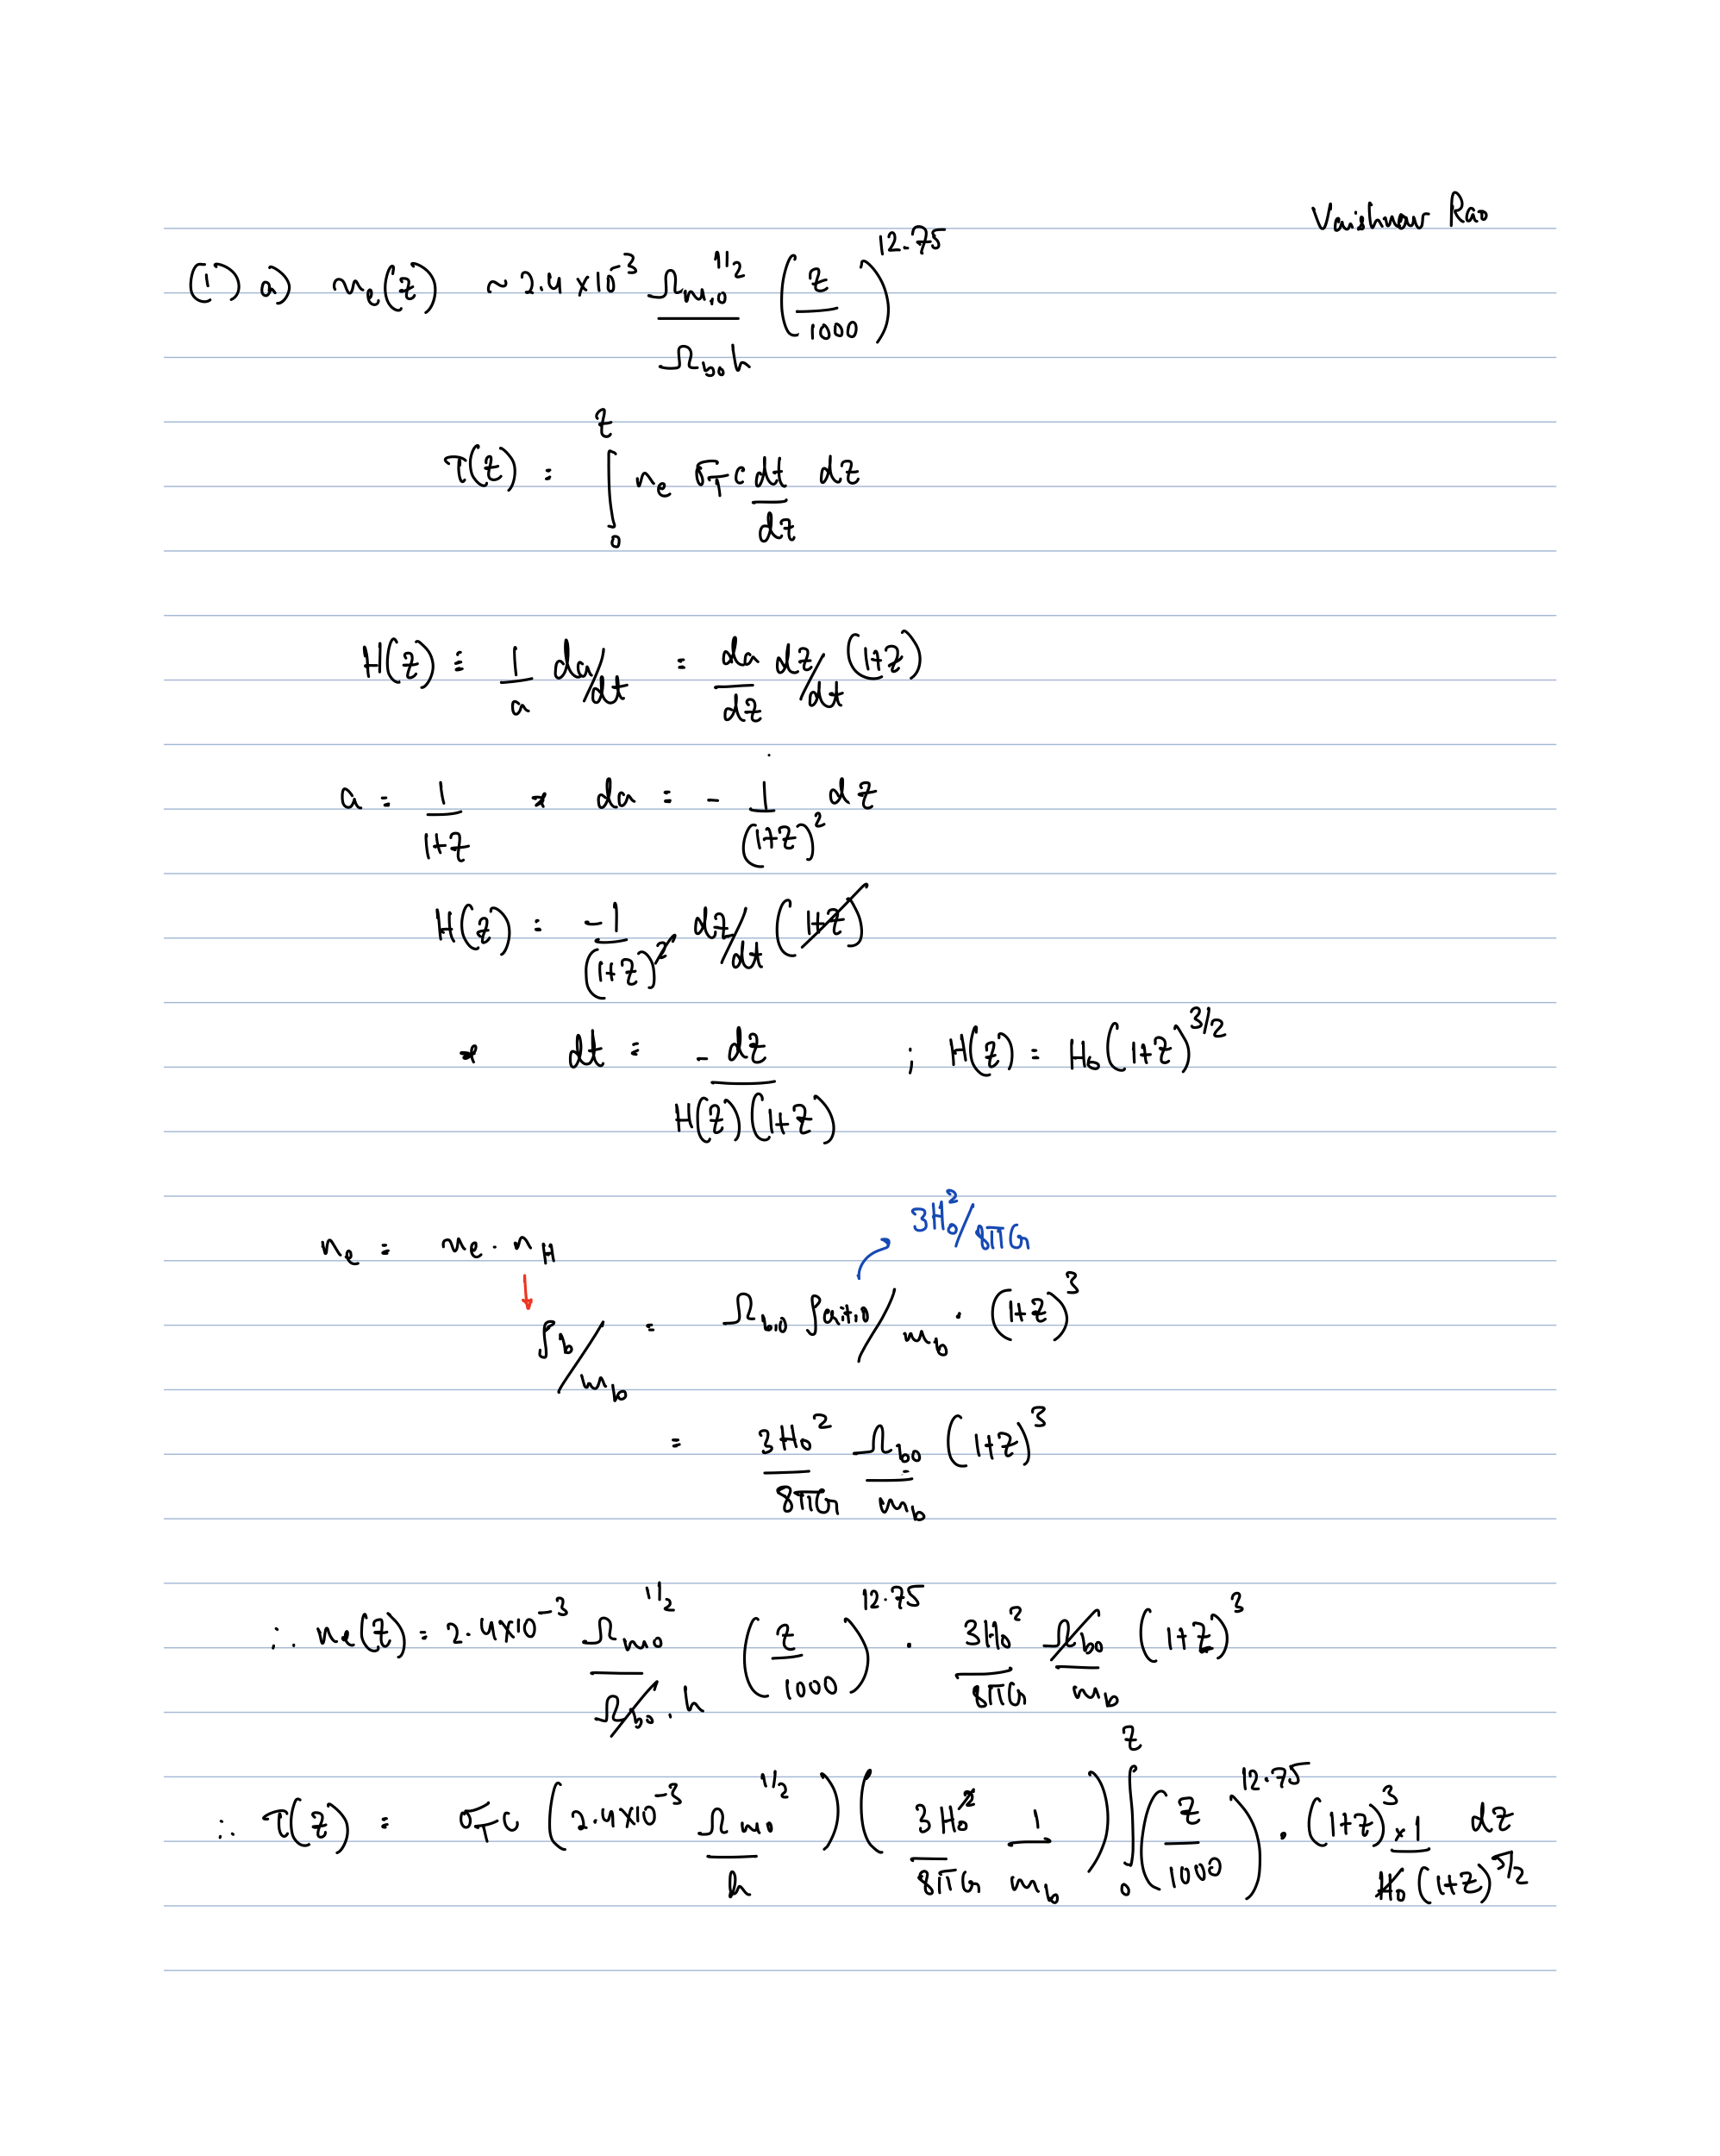
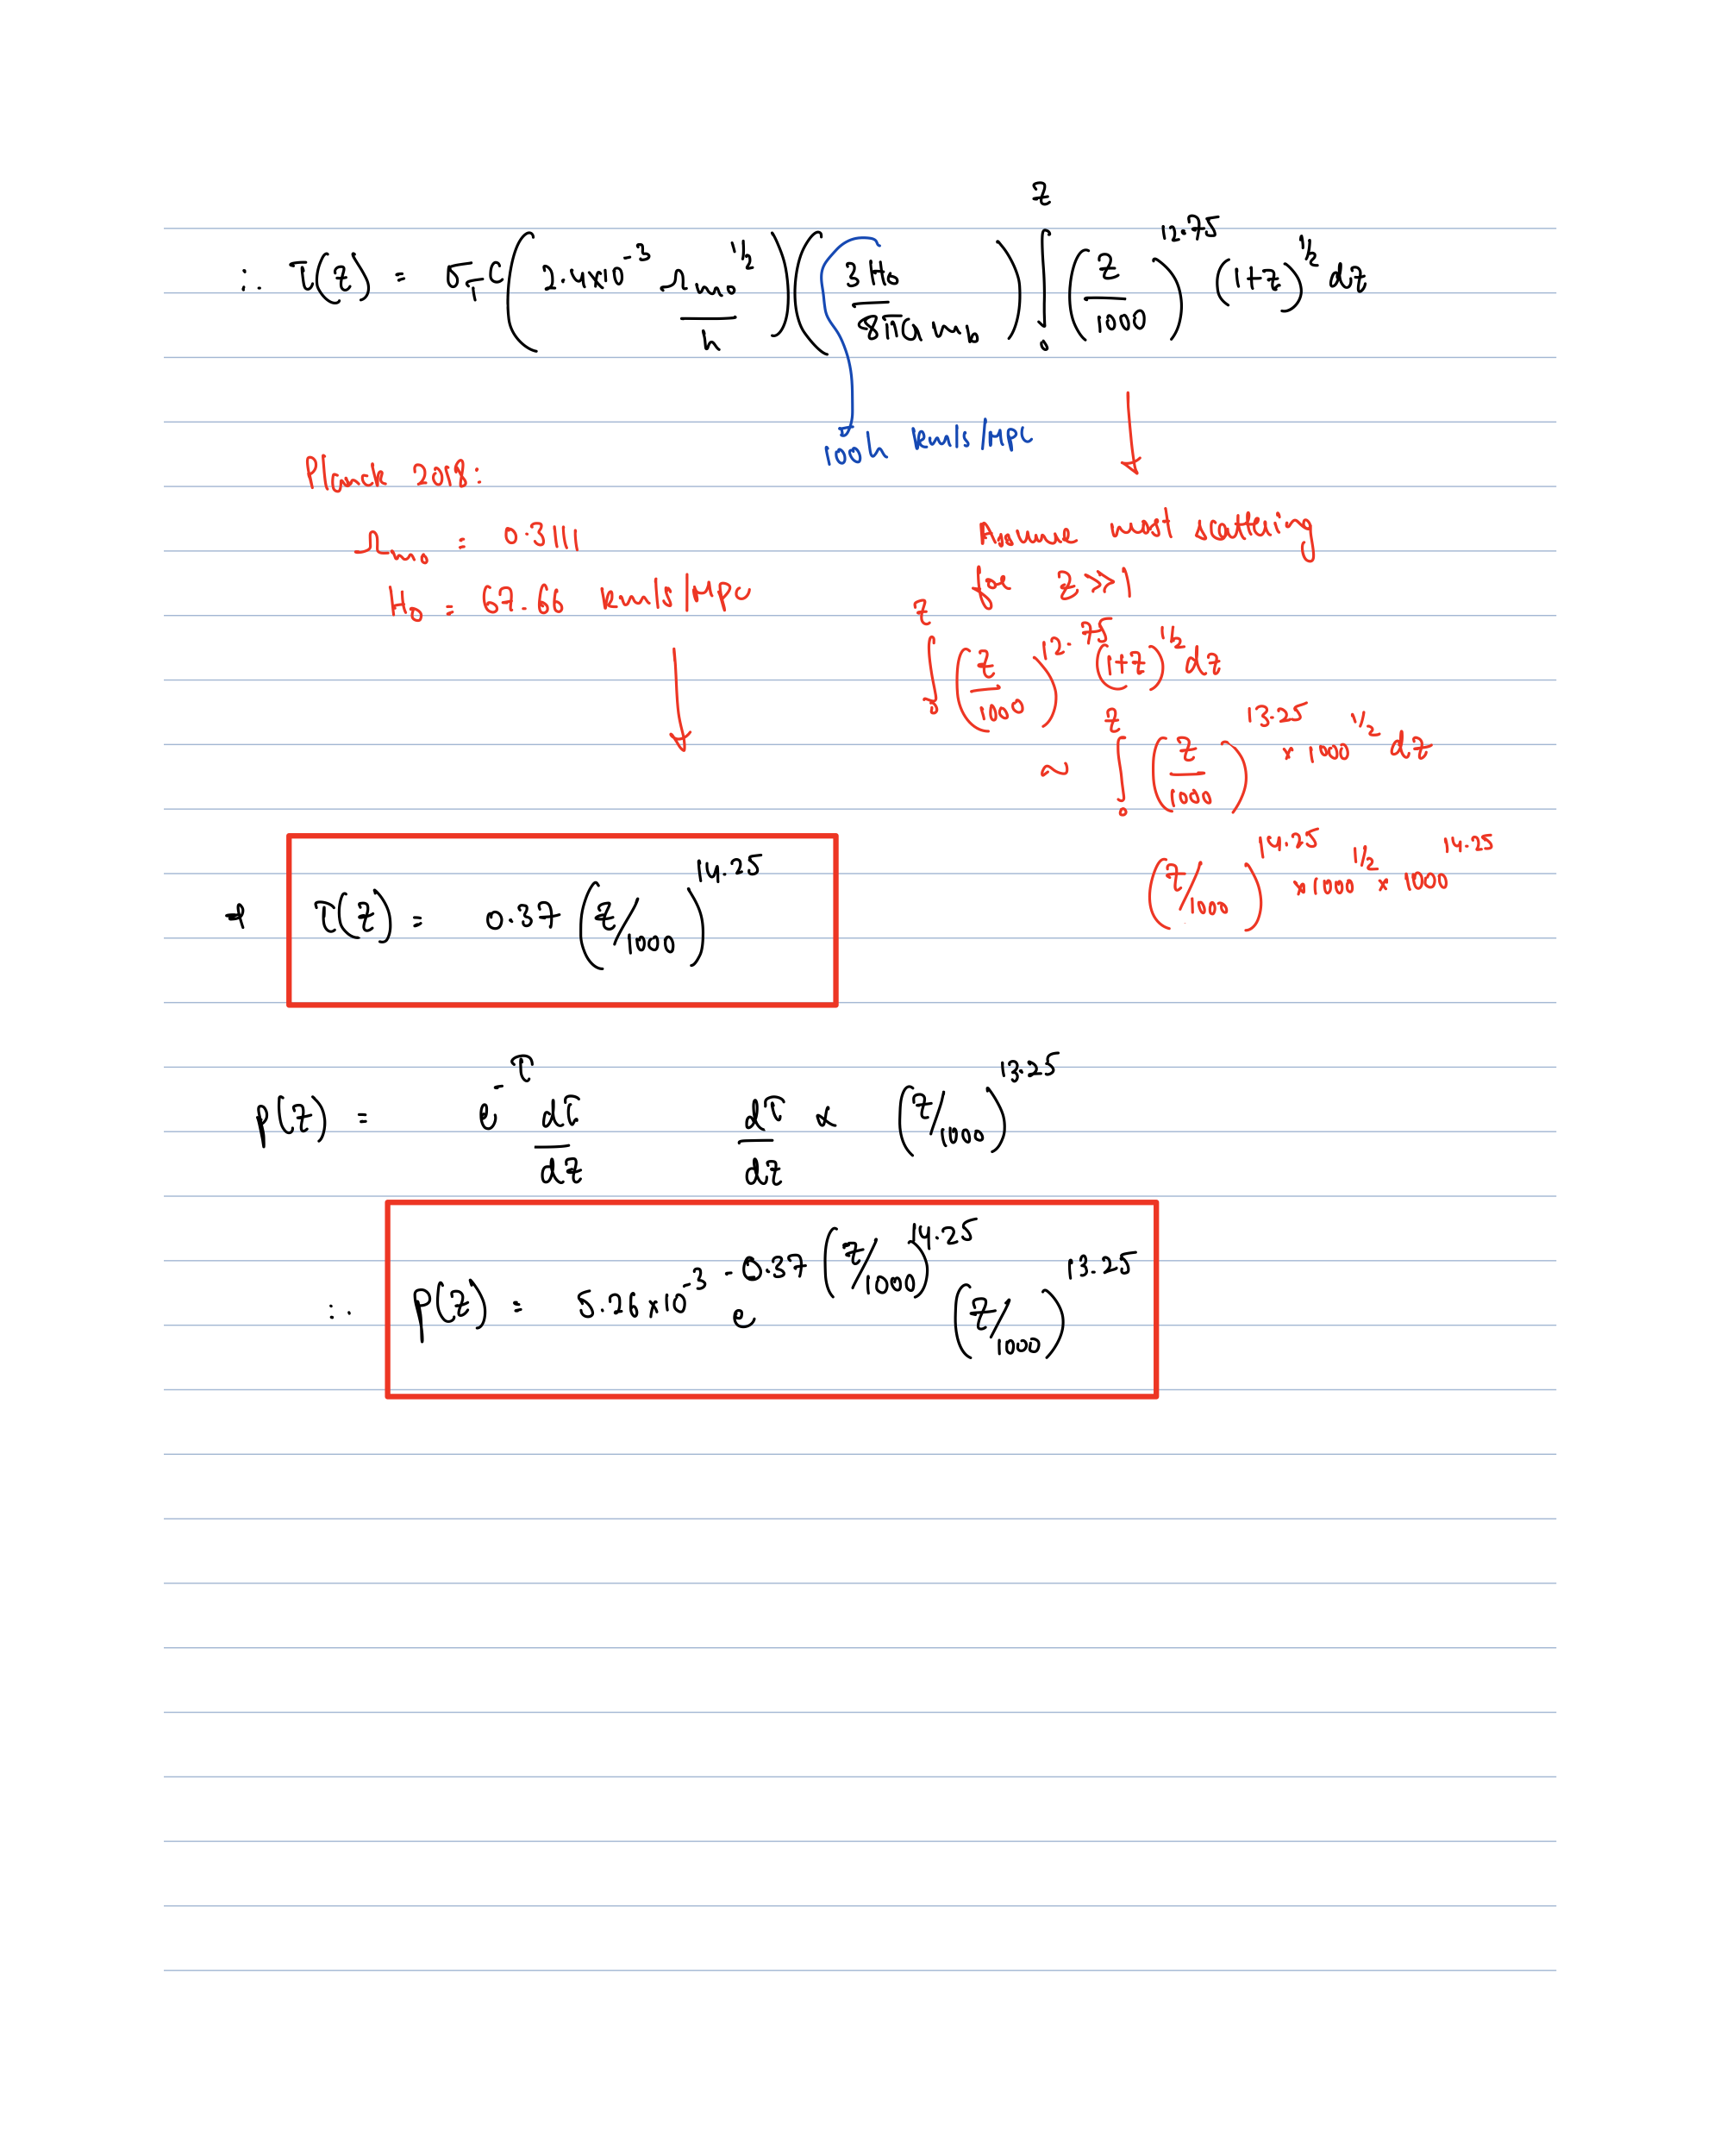

In [1]:
from headers import *

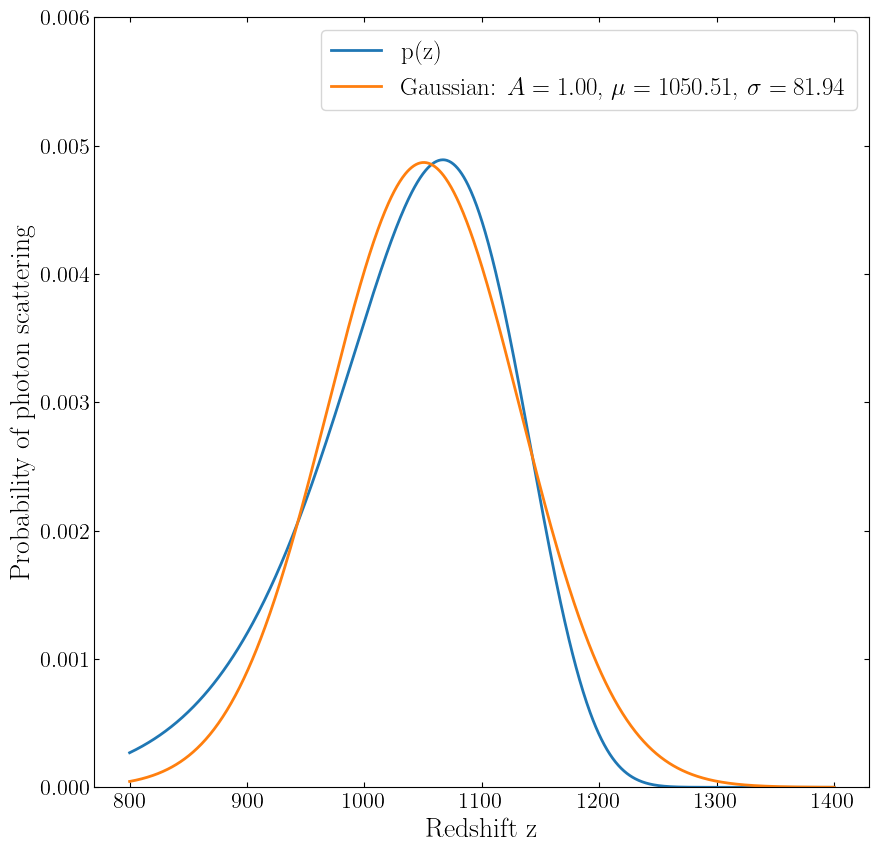

In [10]:
def p(z):
    #Probability of a photon being scattered at redshift z (within a dz interval)
    return 5.26e-3 *np.exp(-0.37*(z/1000)**14.25) * (z/1000)**13.25

#Define a Gaussian function in terms of mean and standard deviation:
def gaussian(z, A, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-0.5*((z-mu)/sigma)**2)

#Redshift:
z = np.linspace(800, 1400, 1000)

#Probability of a photon being scattered at redshift z (within a dz interval)
P = p(z)

#Fit a Gaussian to the probability distribution:
popt, pcov = curve_fit(gaussian, z, P, p0=[1, 1000, 100])

#Plot the probability distribution and the Gaussian fit:
fig, ax = plt.subplots()
ax.plot(z, P, label='p(z)', lw = 2)
ax.plot(z, gaussian(z, *popt), label=r'Gaussian: $A=%.2f$, $\mu=%.2f$, $\sigma=%.2f$' % tuple(popt), lw = 2)
ax.set_xlabel('Redshift z')
ax.set_ylabel('Probability of photon scattering')
ax.legend(loc= 'upper right')
ax.set_ylim(0, 0.006)
plt.show()



__Problem 2.__ (50 points)

The characteristic size of hot and cold spots in the cosmic microwave background (corresponding to the first peak of $C_l$) is

$$ \theta_c \approx \frac{d_s}{d_A\,(z_{\rm rec}\,)}$$

where

$$ d_s = a_{\rm rec} \int_0^{t_{\rm rec}} \frac{c_s \, dt}{a} $$

is the sound horizon at the redshift of recombination ($z_{\rm rec} \approx 1100$), and $d_A(z_{\rm rec})$ is the angular diameter distance. The speed of sound in the photon-baryon fluid is

$$ c_s = \frac{c}{\sqrt{3(1+{\cal R})}} $$

where 

$$ {\cal R} = \frac{3\rho_b}{4\rho_\gamma}$$

is the ratio of the energy density of baryons to the energy density of photons.

(a) Using $\Omega_{b0}\,h^2$ and $\Omega_{\gamma 0}\,h^2$ from Planck 2018 results, calculate the value of ${\cal R}_s \equiv {\cal R}(z = z_{\rm rec})$. In a few sentences describe which observations provide best measurements of these values of $\Omega_{b0}$ and $\Omega_{\gamma 0}$.

(b) First assume a spatially flat, completely matter-dominated universe with $H_0 = 70$ km/s/Mpc (a reasonably good approximation at $z = z_{\rm rec}$), and a constant sound speed with ${\cal R} = {\cal R}_s$. Derive analytical expressions for $d_s$, $d_A(z_{\rm rec})$, and $\theta_c$.


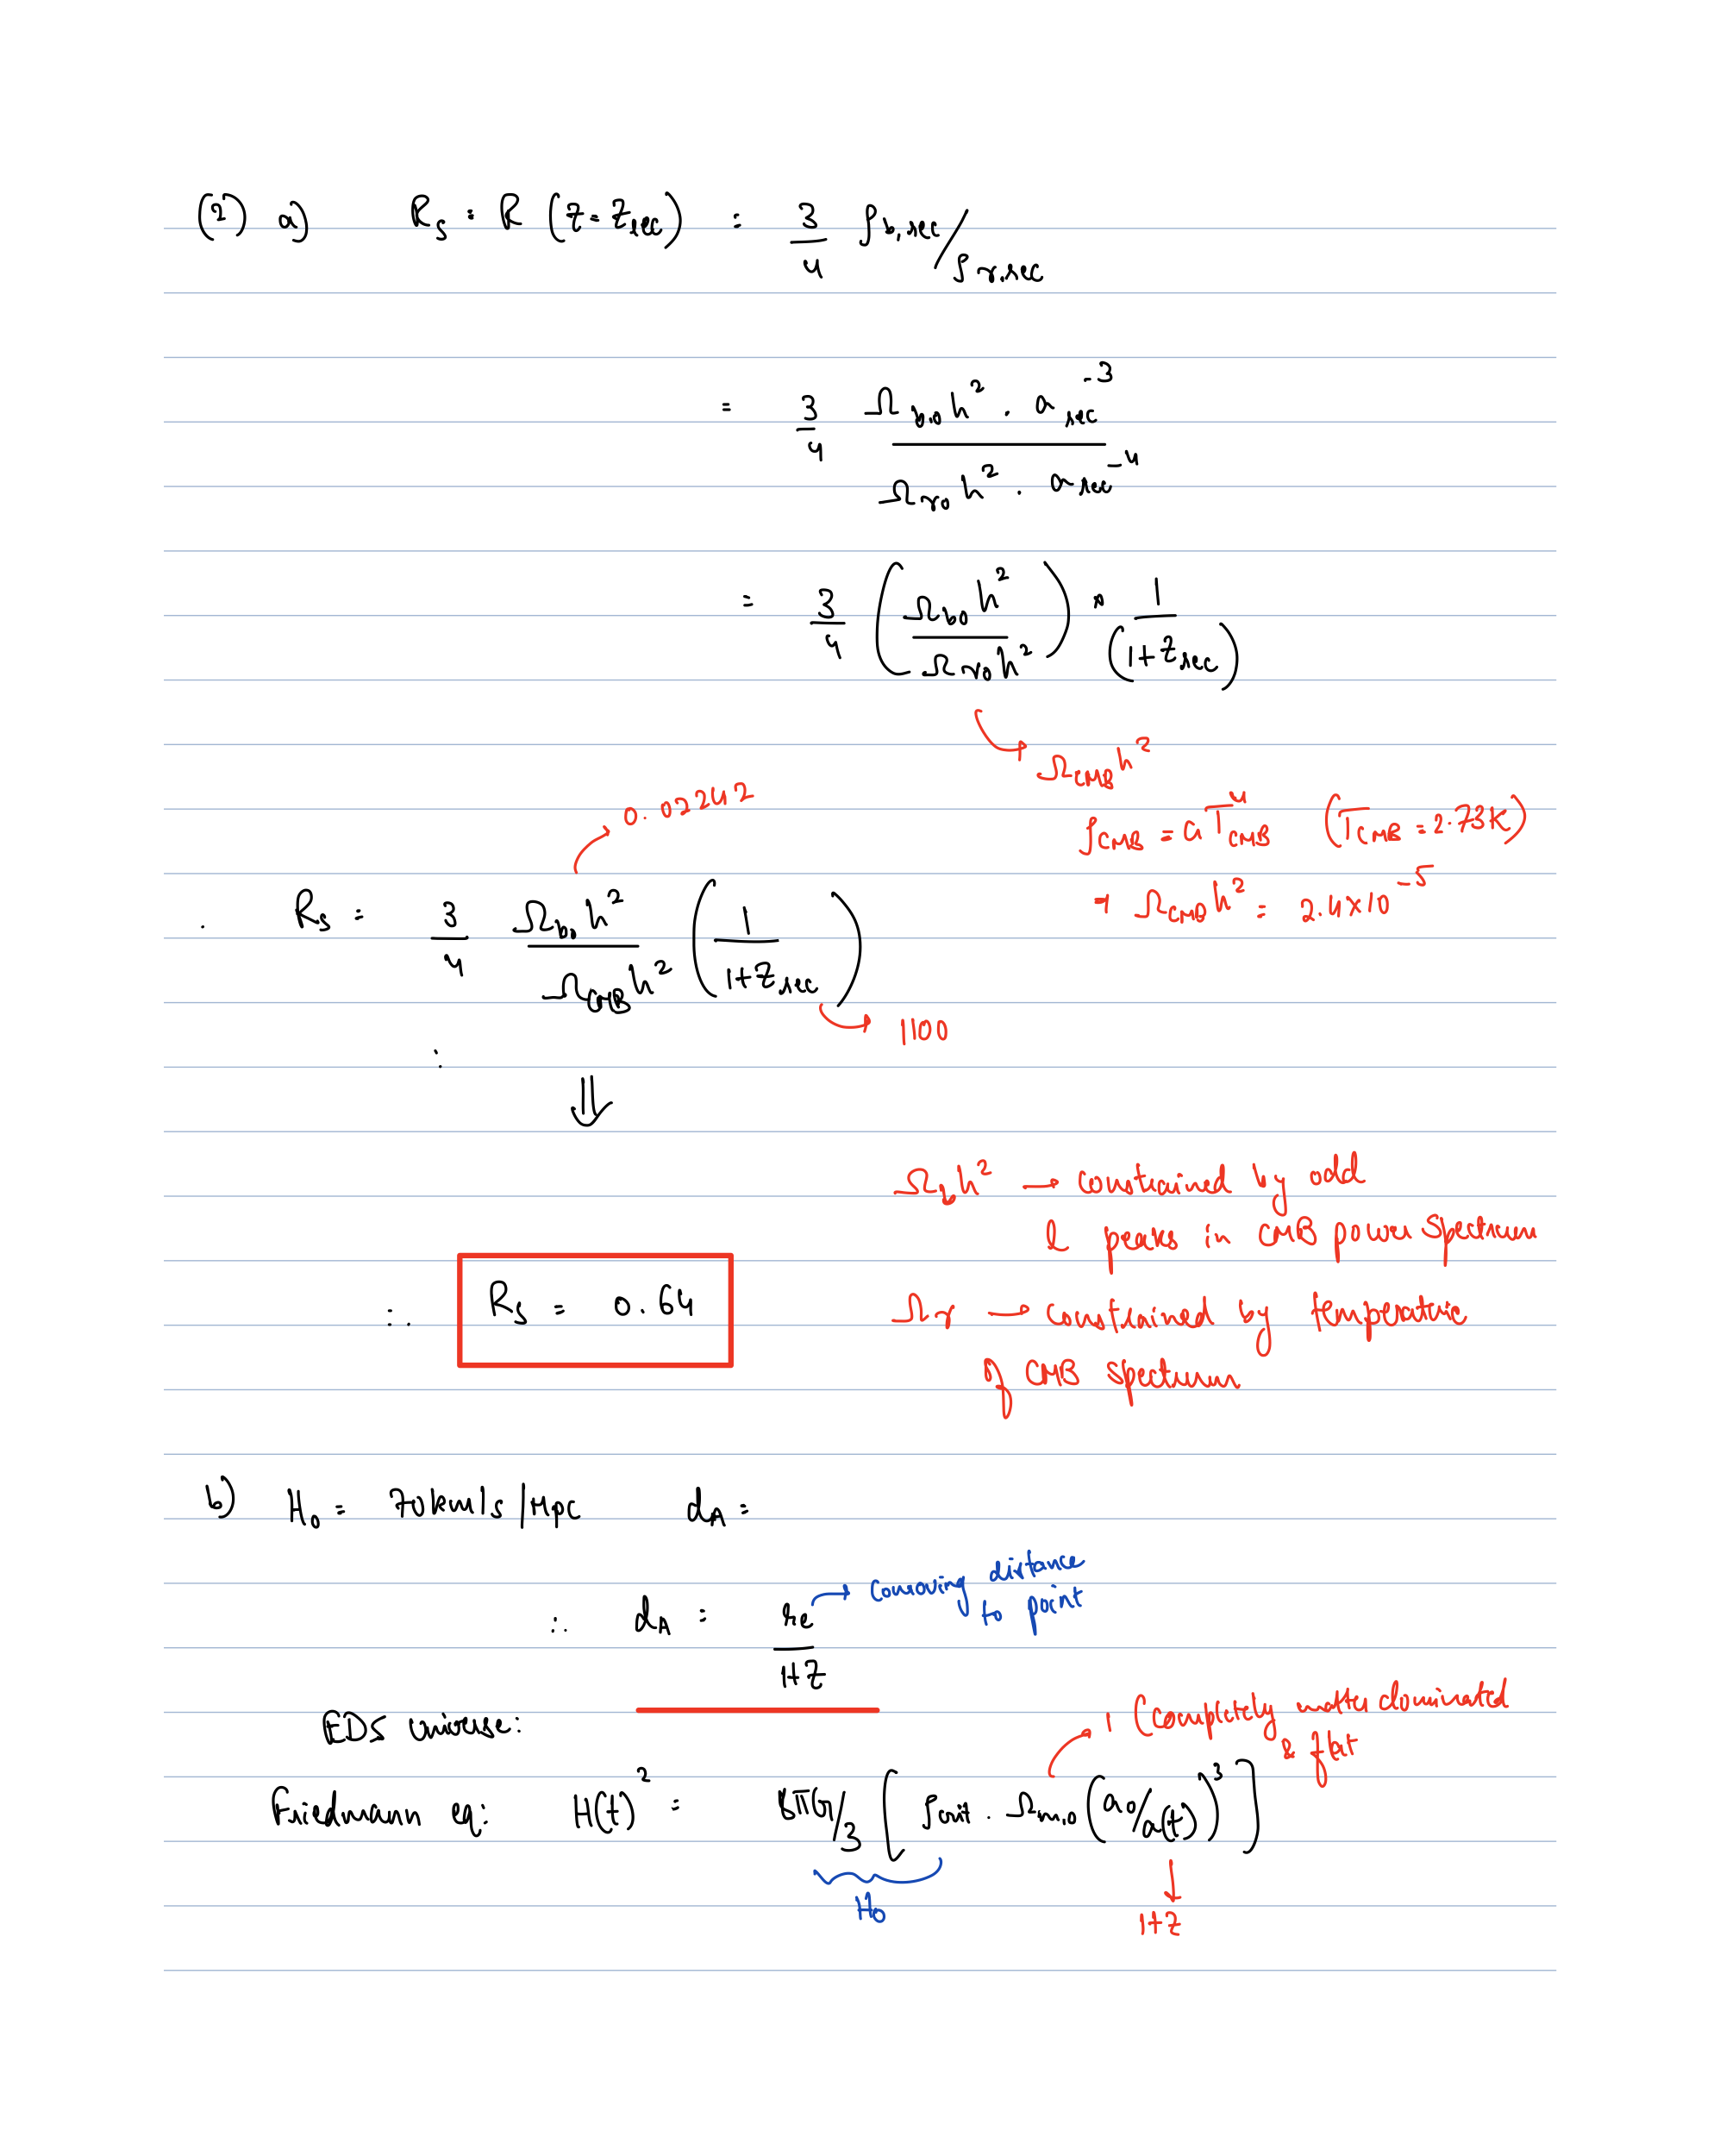
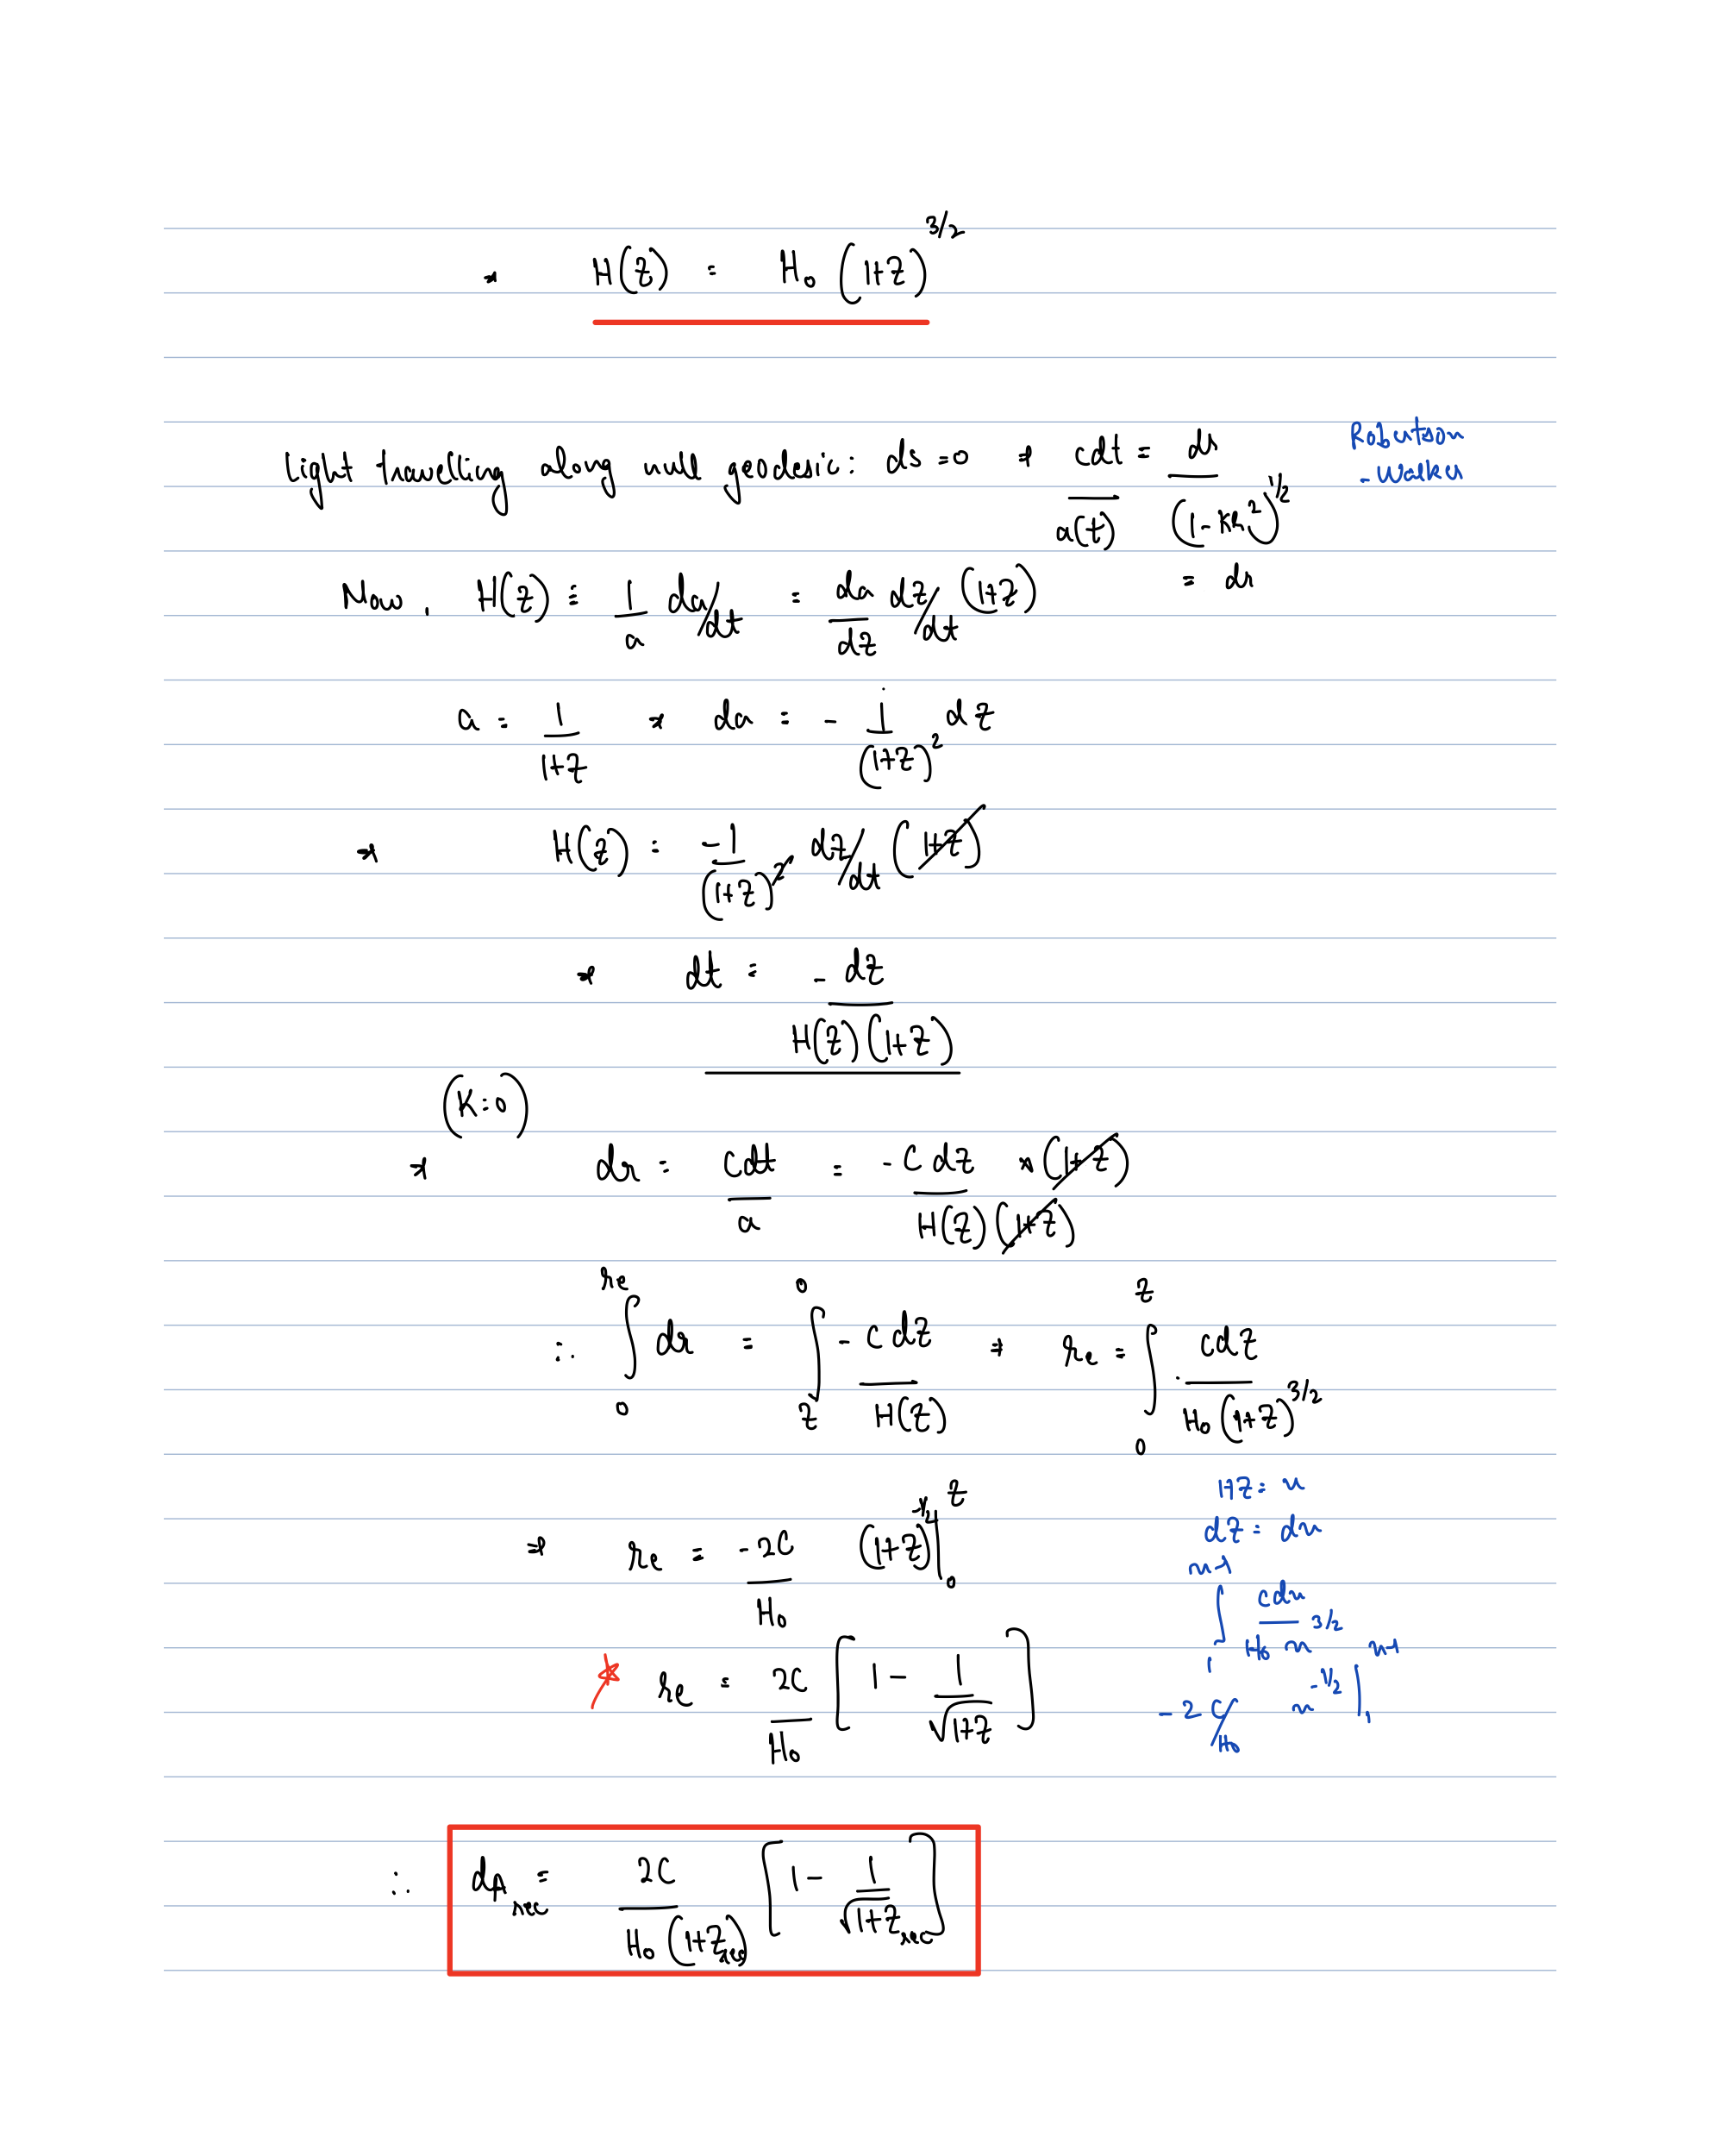
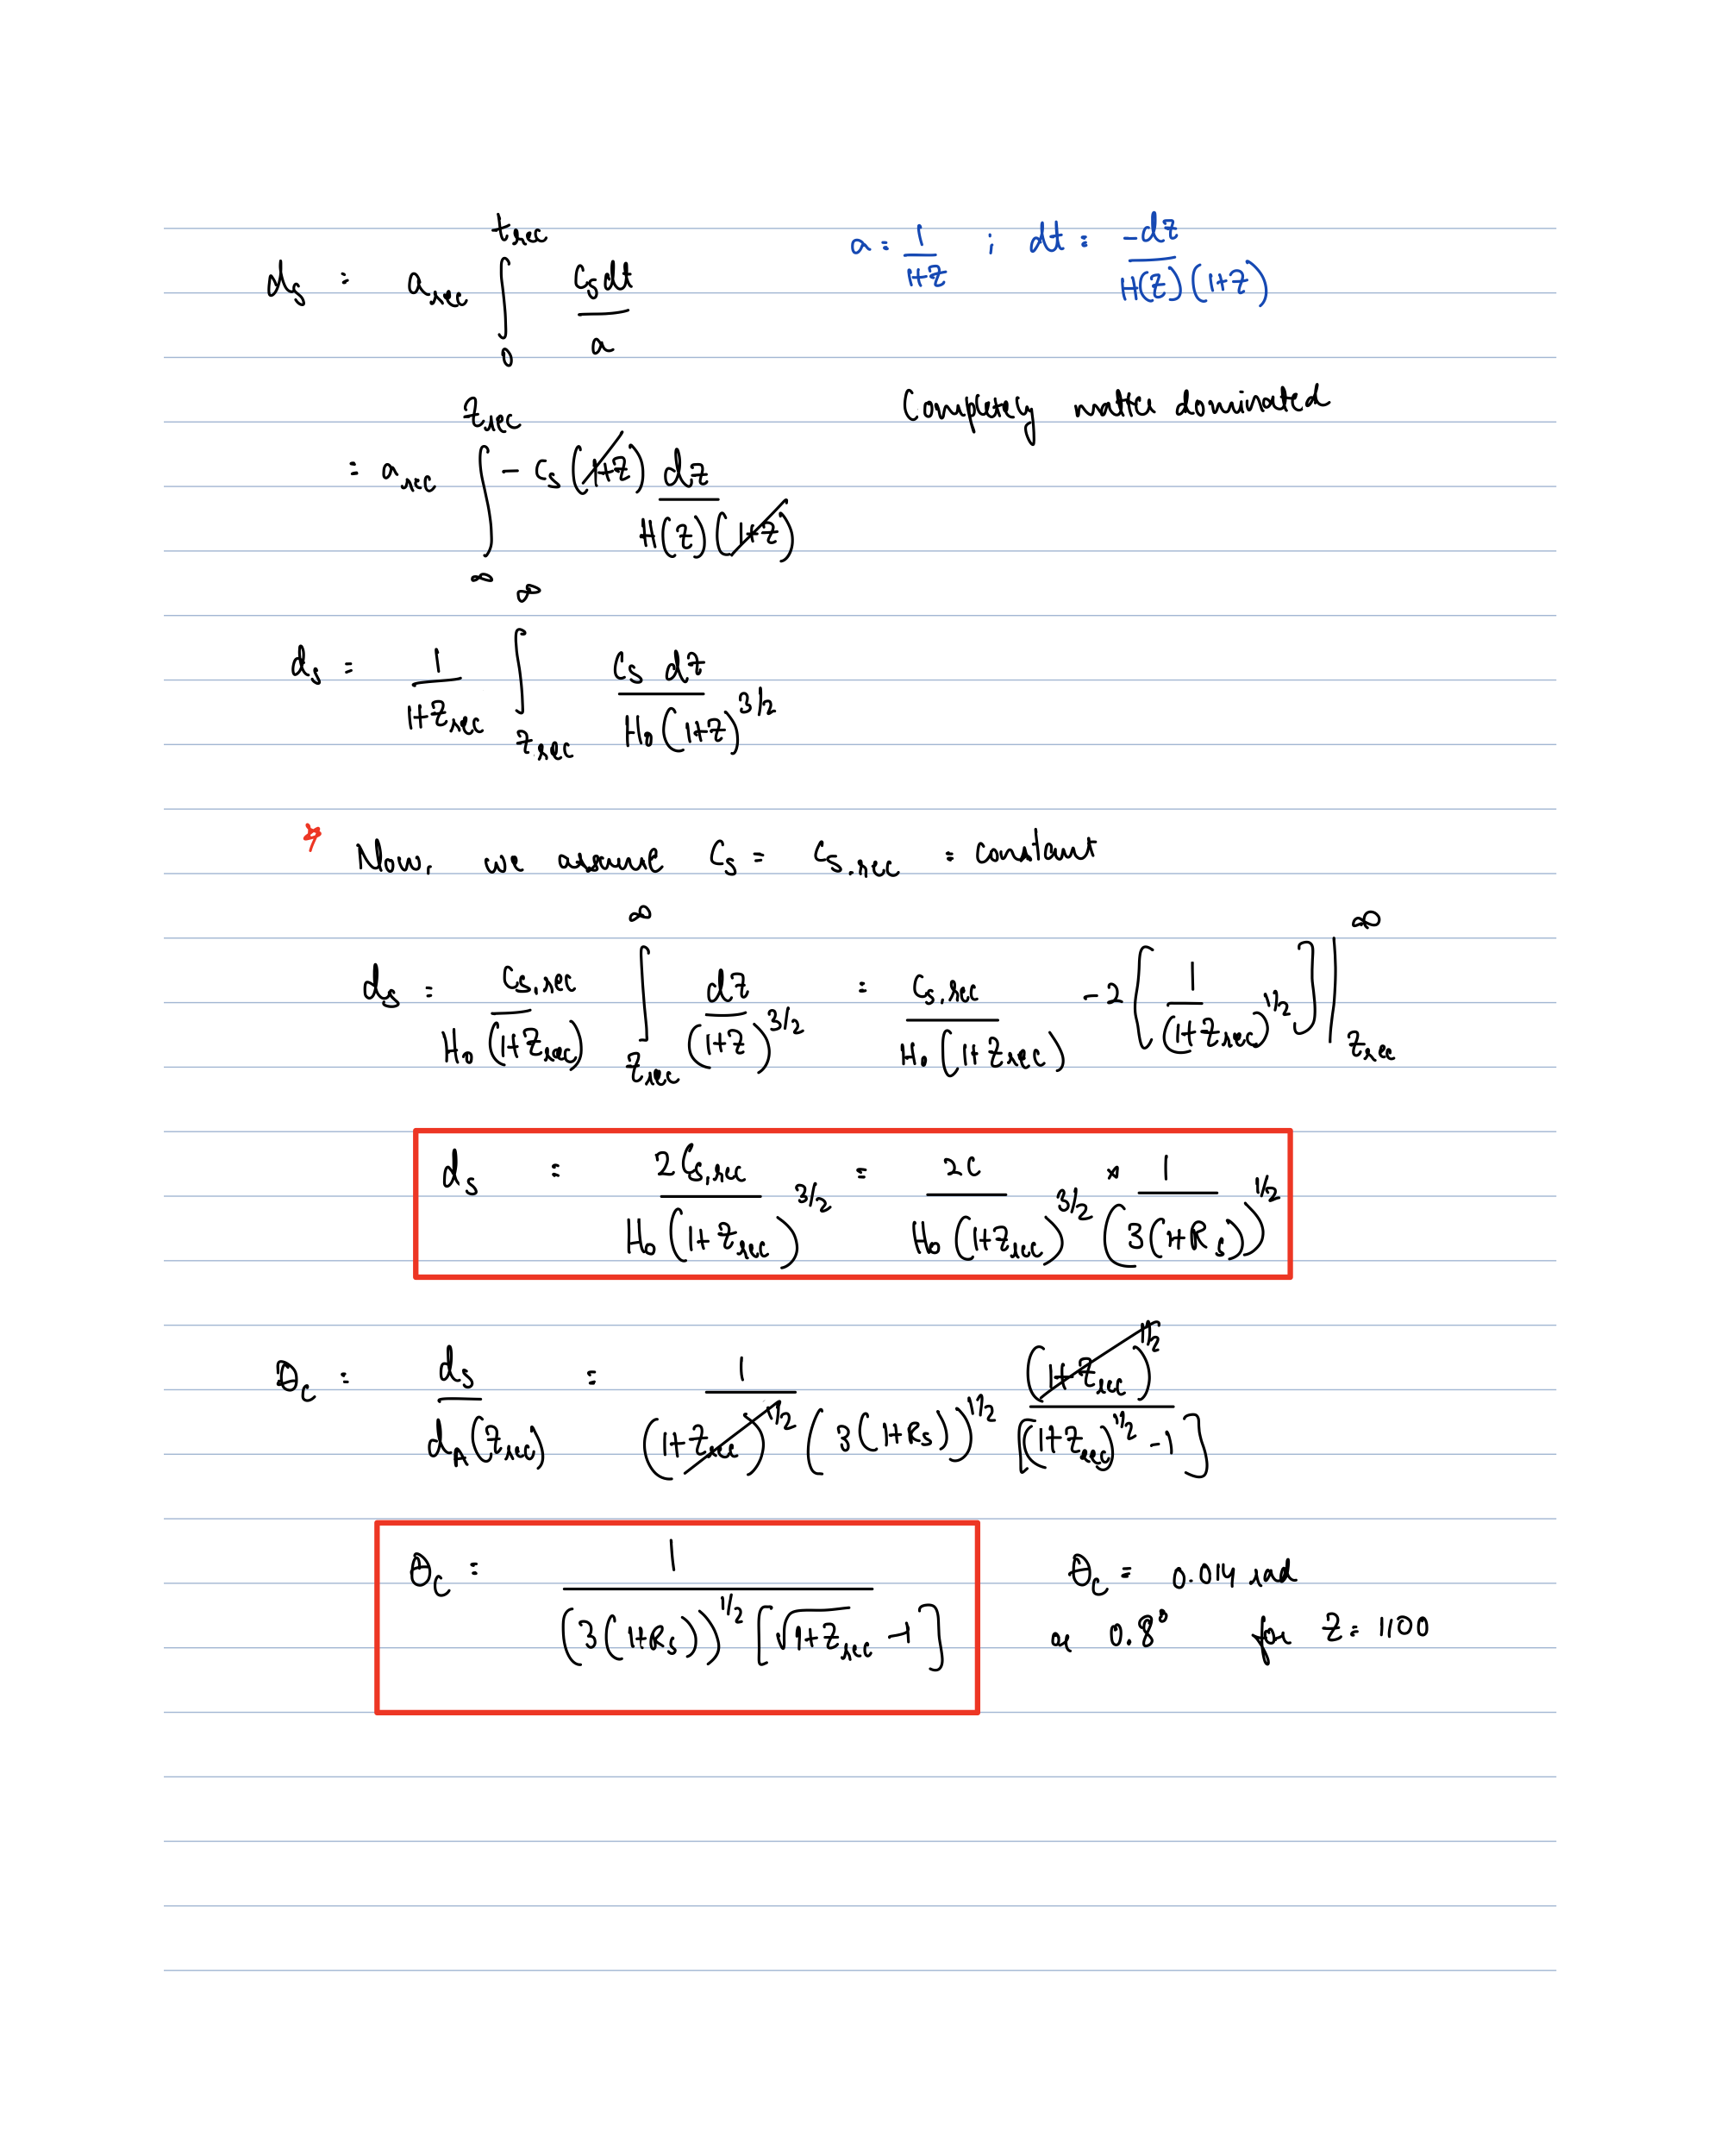


(c) Now include the effects of radiation density and variable ${\cal R}(z)$, and integrate $d_s$, $d_A(z_{\rm rec})$, and $\theta_c$ numerically. Express $d_s$ and $d_A(z_{\rm rec})$ as $\frac{c}{H_0}$ times a number that you calculated, and give $\theta_c$ in degrees.  Still assume matter domination.


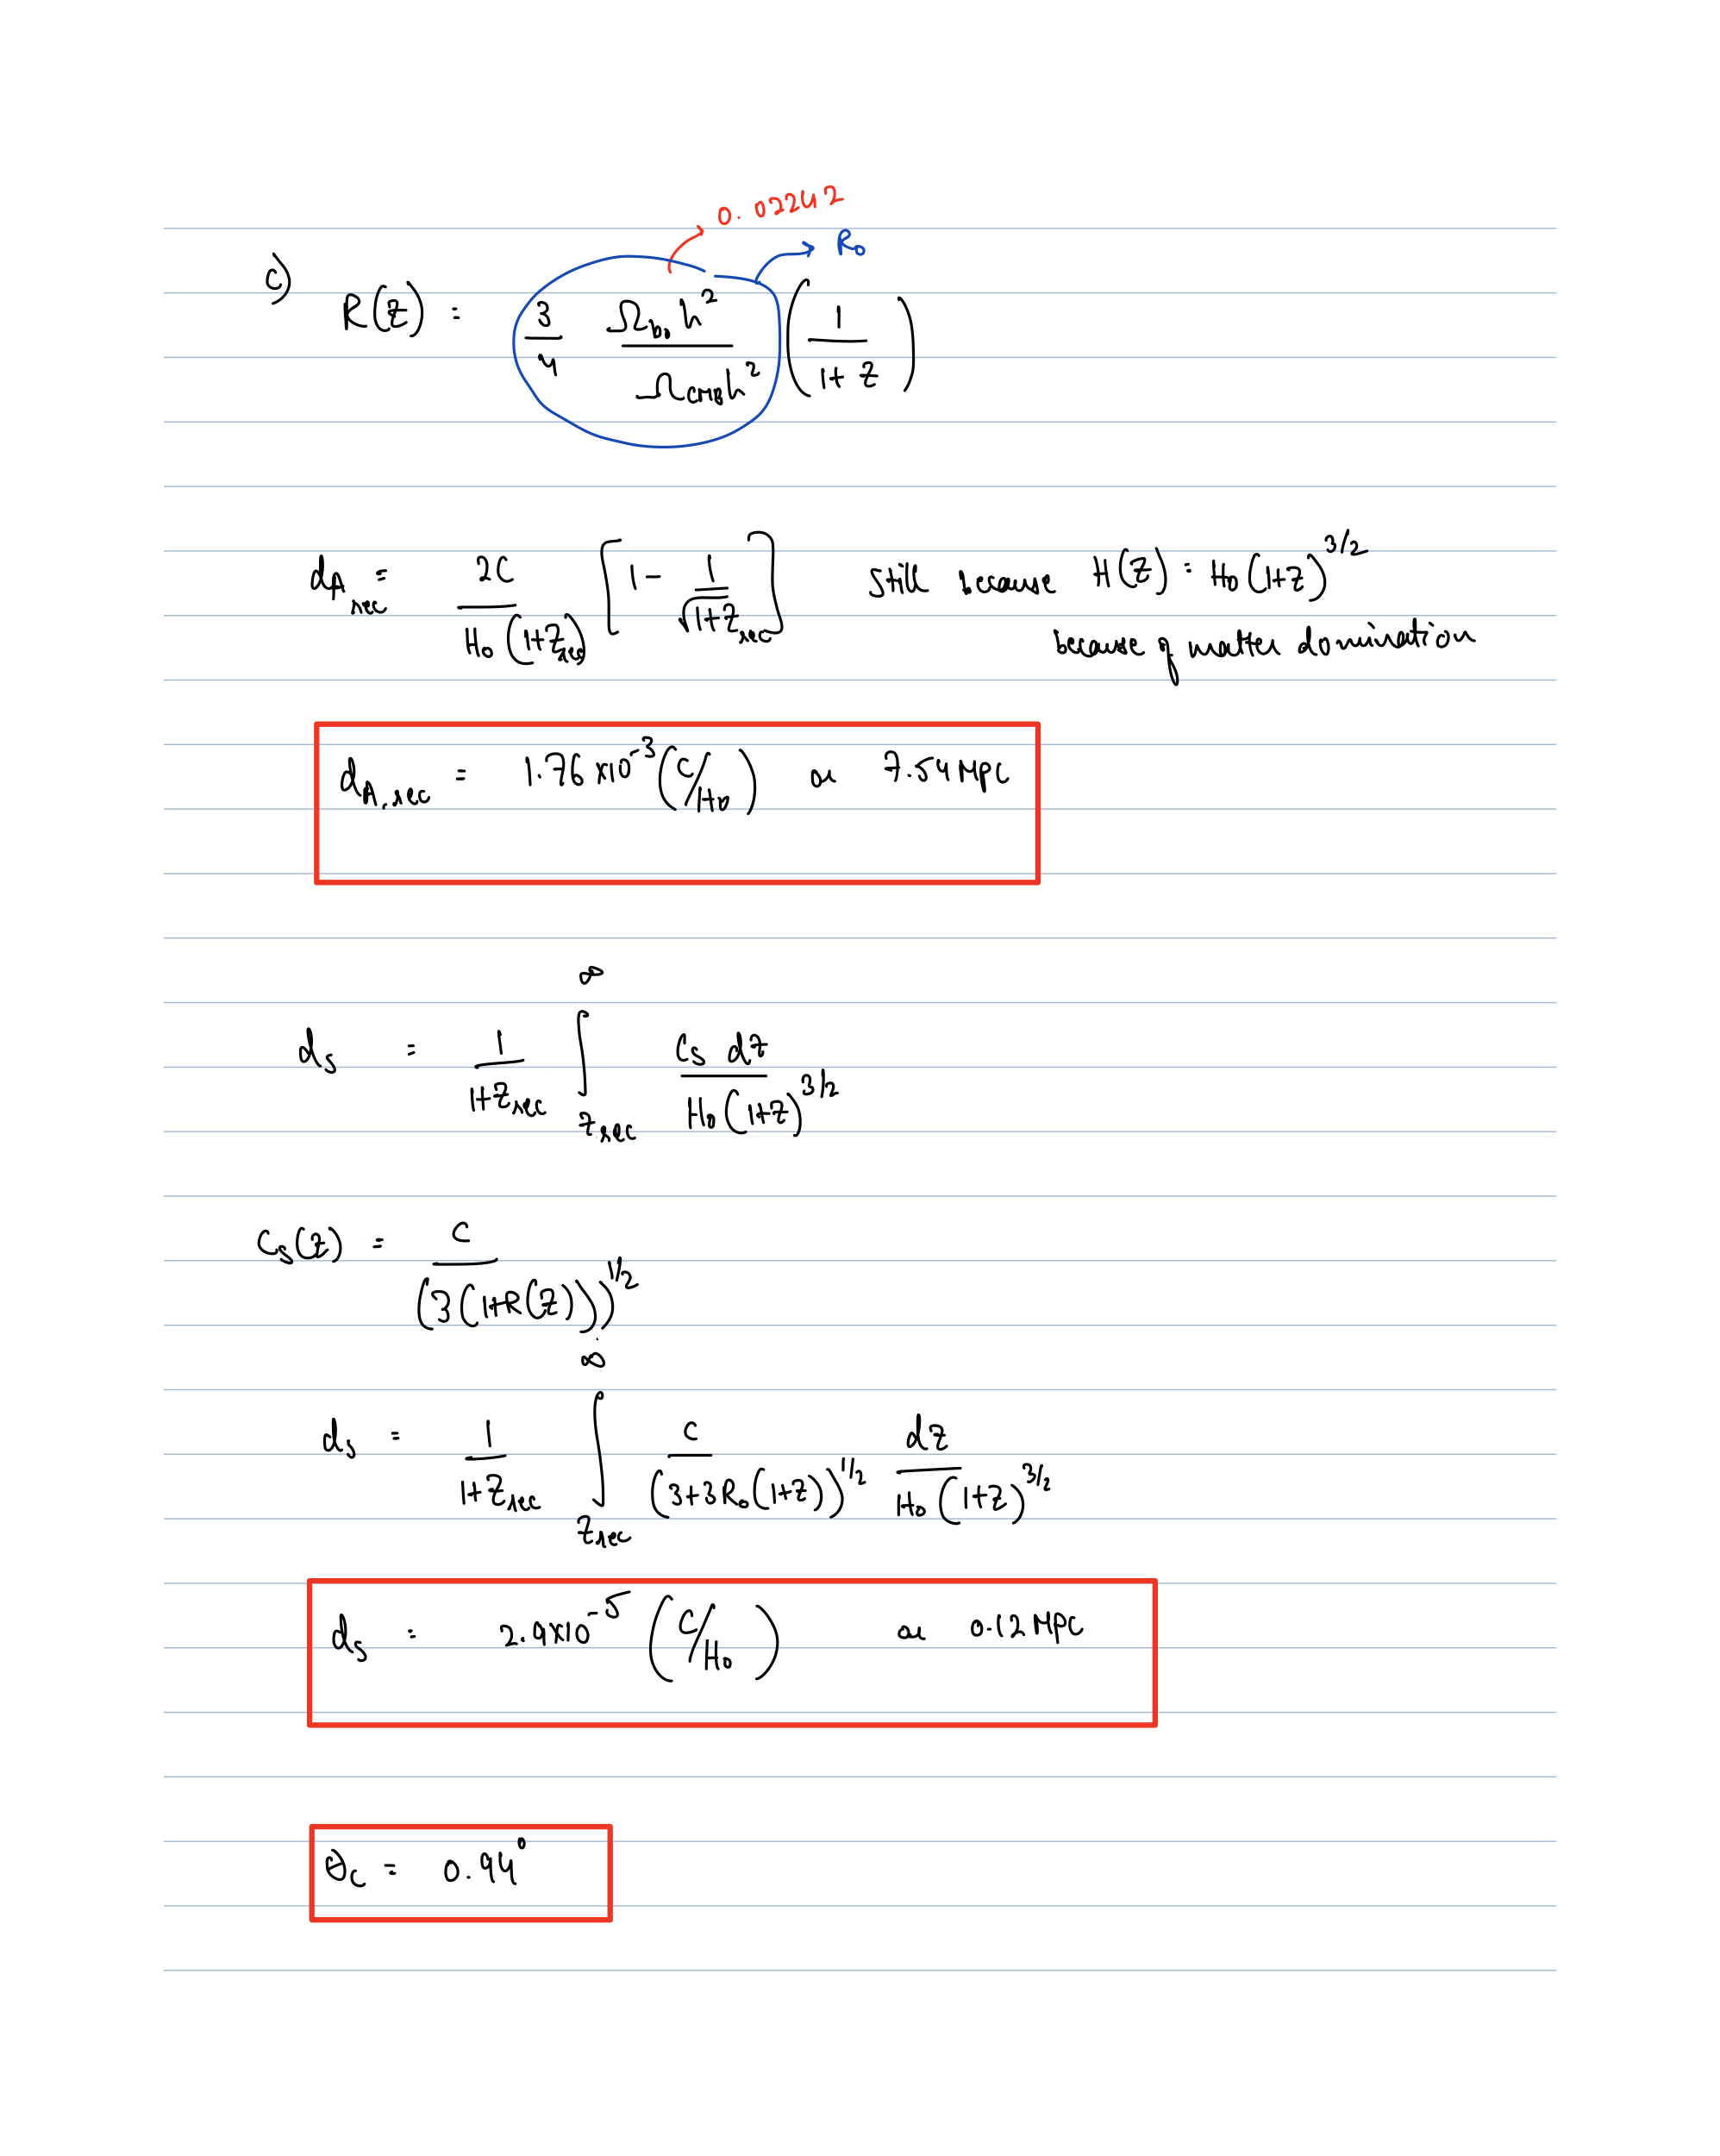

In [25]:
from scipy.integrate import quad as quad
import astropy.constants as const

#Redshift of recombination:
z_rec = 1100

#Hubble constant:
H0 = 70 *u.km/u.s/u.Mpc

#Angular diameter distance in terms of c/H0:
dA = (2/(1+z_rec))*(1-1/(1+z_rec)**(0.5))
print('Angular diameter distance in terms of c/H0:', dA)

#Angular diameter distance in terms of Mpc:
factor1 = const.c.to('Mpc/s').value/H0.to('s^-1').value
dA = dA*factor1
print('Angular diameter distance in terms of Mpc:', dA)

def R(z):
    R = (3*0.02242/(4*2.4e-5))*(1/(1+z))
    return R

def sound_horizon_integrand(z):
    return (1/(3*(1+R(z))))**(0.5)* (1+z)**(-3/2)

#Calculate sound horizon in terms of c/H0:
#Intergrate the sound horizon integrand from z_rec to infinity:
ds, error = quad(sound_horizon_integrand, z_rec, np.inf)
ds = (1/(1+z_rec))*ds
print('Sound horizon in terms of c/H0:', ds)

#Calculate the sound horizon in terms of Mpc:
factor2 = const.c.to('Mpc/s').value/H0.to('s^-1').value
ds = ds*factor2
print('Sound horizon in terms of Mpc:', ds)

#Characteristic size of CMB spots:
theta = ds/dA
print('Characteristic size of CMB spots:', theta*u.rad.to('degree'), 'degrees')

Angular diameter distance in terms of c/H0: 0.0017617848524360661
Angular diameter distance in terms of Mpc: 7.545283019699652
Sound horizon in terms of c/H0: 2.895931419106286e-05
Sound horizon in terms of Mpc: 0.12402548547618597
Characteristic size of CMB spots: 0.9417985847970766 degrees



(d) Suppose that $h=0.5$ instead of 0.7. How does $\theta_c$ change?  Calculate it first in the above analytical model, and then in the numerical model.

(e) Suppose that $\Omega_\Lambda=0.7$ instead of $\Omega_\Lambda=0$ (still assume flat universe and $h=0.7$). By approximately what factor does $d_s$ change?  By approximately what factor does $d_A(z_{\rm rec})$ change? What happens to $\theta_c$?


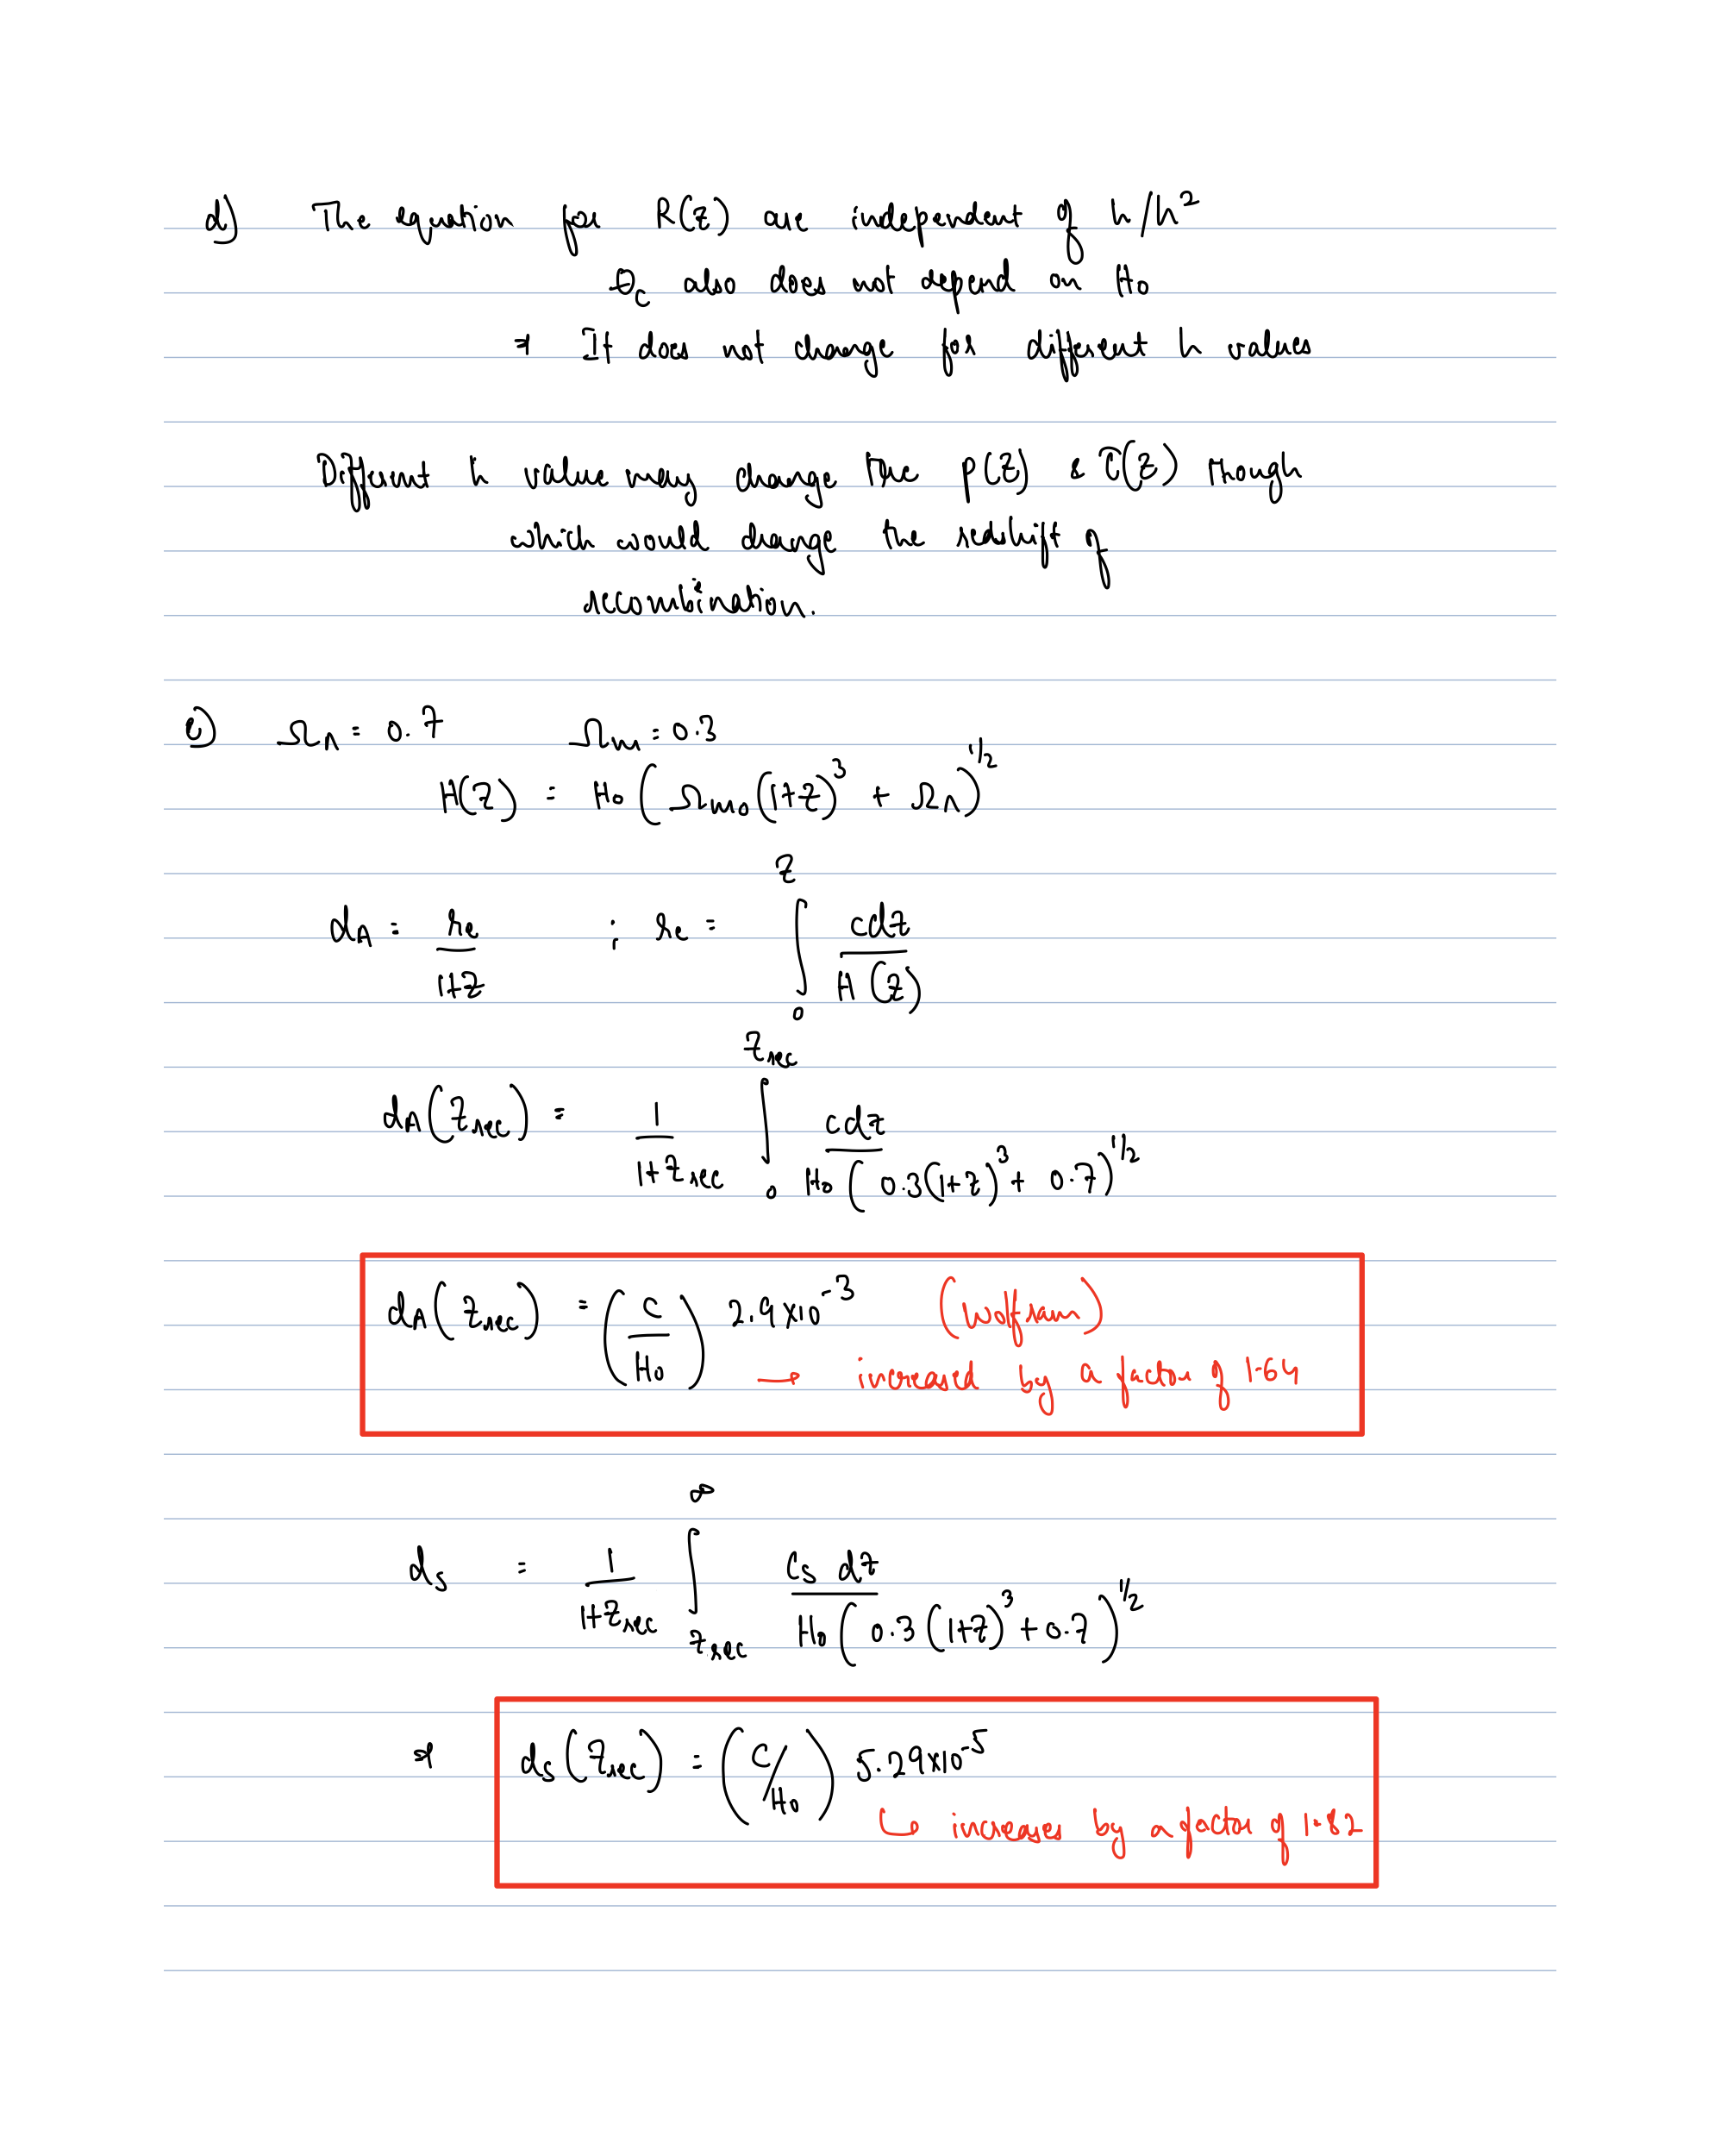
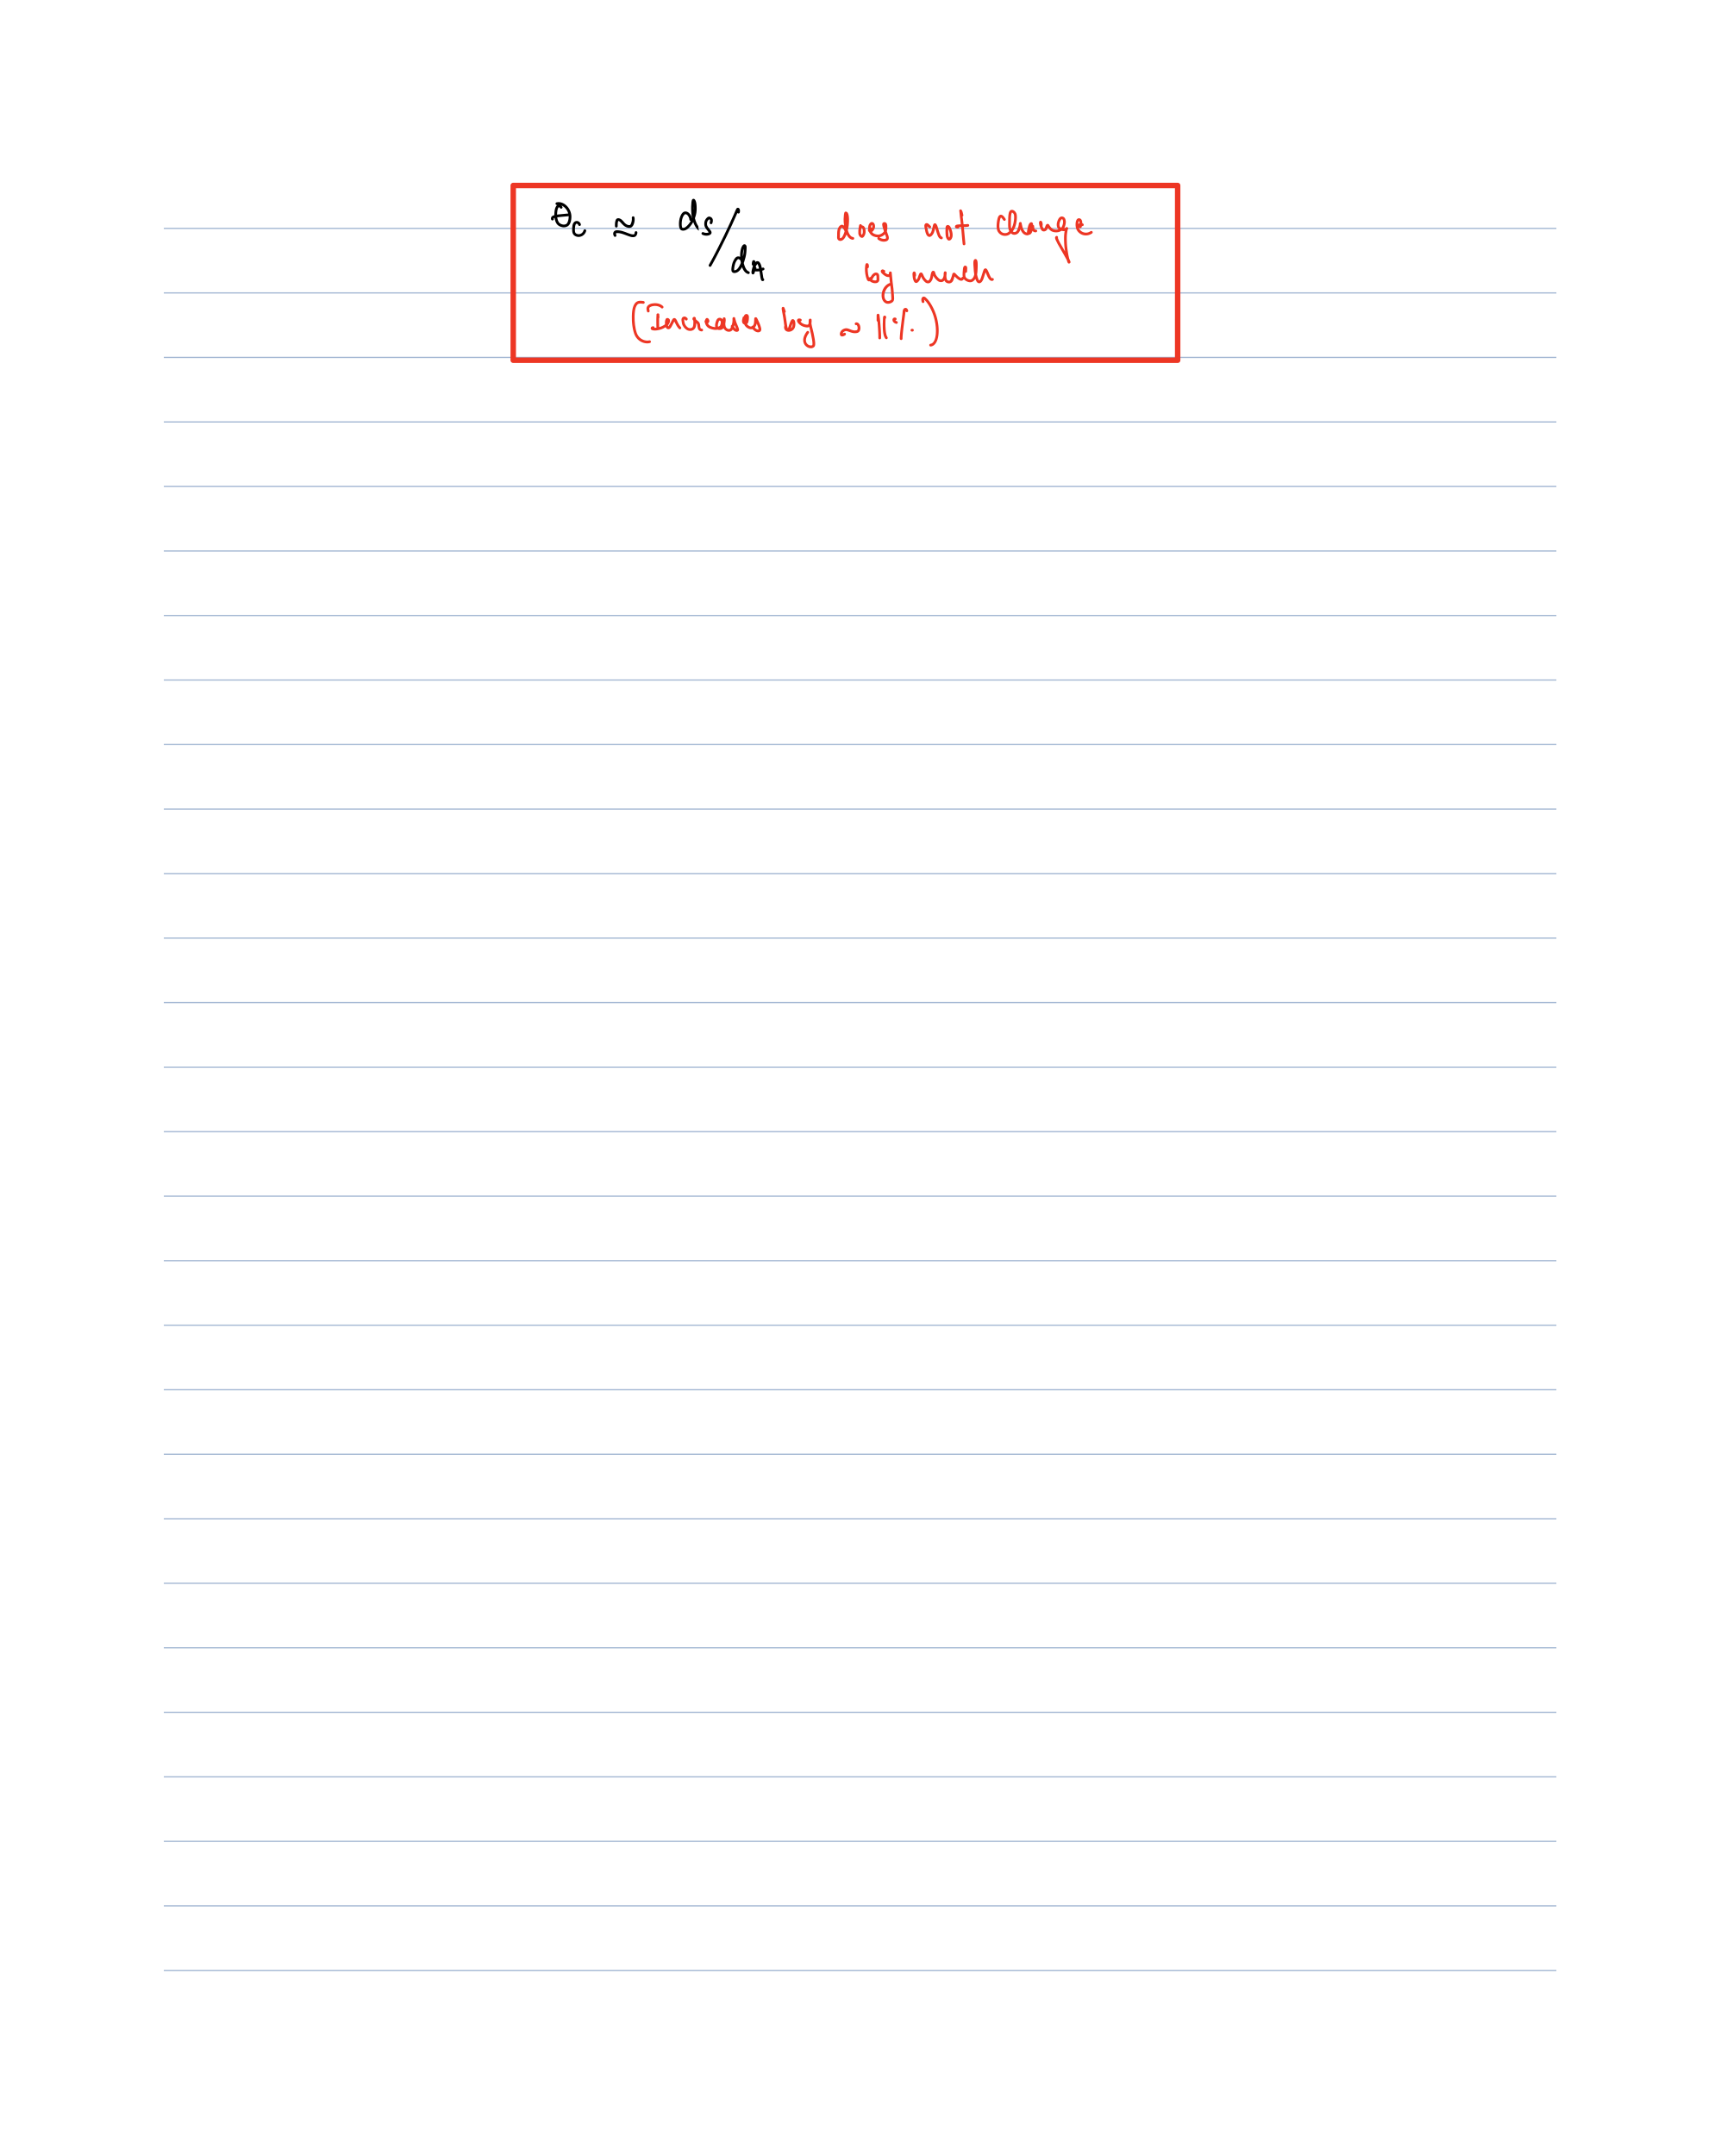

In [27]:
def sound_horizon_integrand2(z):
    #Sound Horizon integrand in Universe where Omega_Lambda = 0.7:
    return (1/(3*(1+R(z))))**(0.5)/( 0.3*(1+z)**(3) + 0.7)**(0.5)

#Calculate sound horizon in terms of c/H0 in Universe where Omega_Lambda = 0.7:
#Intergrate the sound horizon integrand from z_rec to infinity:
ds2, error = quad(sound_horizon_integrand2, z_rec, np.inf)
ds2 = (1/(1+z_rec))*ds2
print('Sound horizon in terms of c/H0 in Universe where Omega_Lambda = 0.7:', ds2)

Sound horizon in terms of c/H0 in Universe where Omega_Lambda = 0.7: 5.287223208887722e-05



__Problem 3.__ (25 points)
 


Planck satellite measurements indicate the optical depth for electron scattering of CMB photons is $\tau = 0.0561$ with the uncertainty of 0.0071. Calculate the redshift of cosmic hydrogen reionization $z_{re}$, assuming that reionization happened instantaneously.

The optical depth is the integral of the scattering probability from the time of reionization to the present. The scattering probability is proportional to the electron number density; to calculate it assume that hydrogen is fully ionized, all of it is in the intergalactic medium (not in stars), ignore any elements heavier than helium, and ignore the radiation density in the expression for $H(z)$. With these assumptions the integral can be evaluated analytically; if in doubt, you can integrate it numerically. Find $z_{re}$ that gives the observed $\tau$. Include the errors on $\tau$, and find the corresponding range for $z_{re}$.

Compare your inferred range of $z_{re}$ with the values given in the Planck 2018 table.

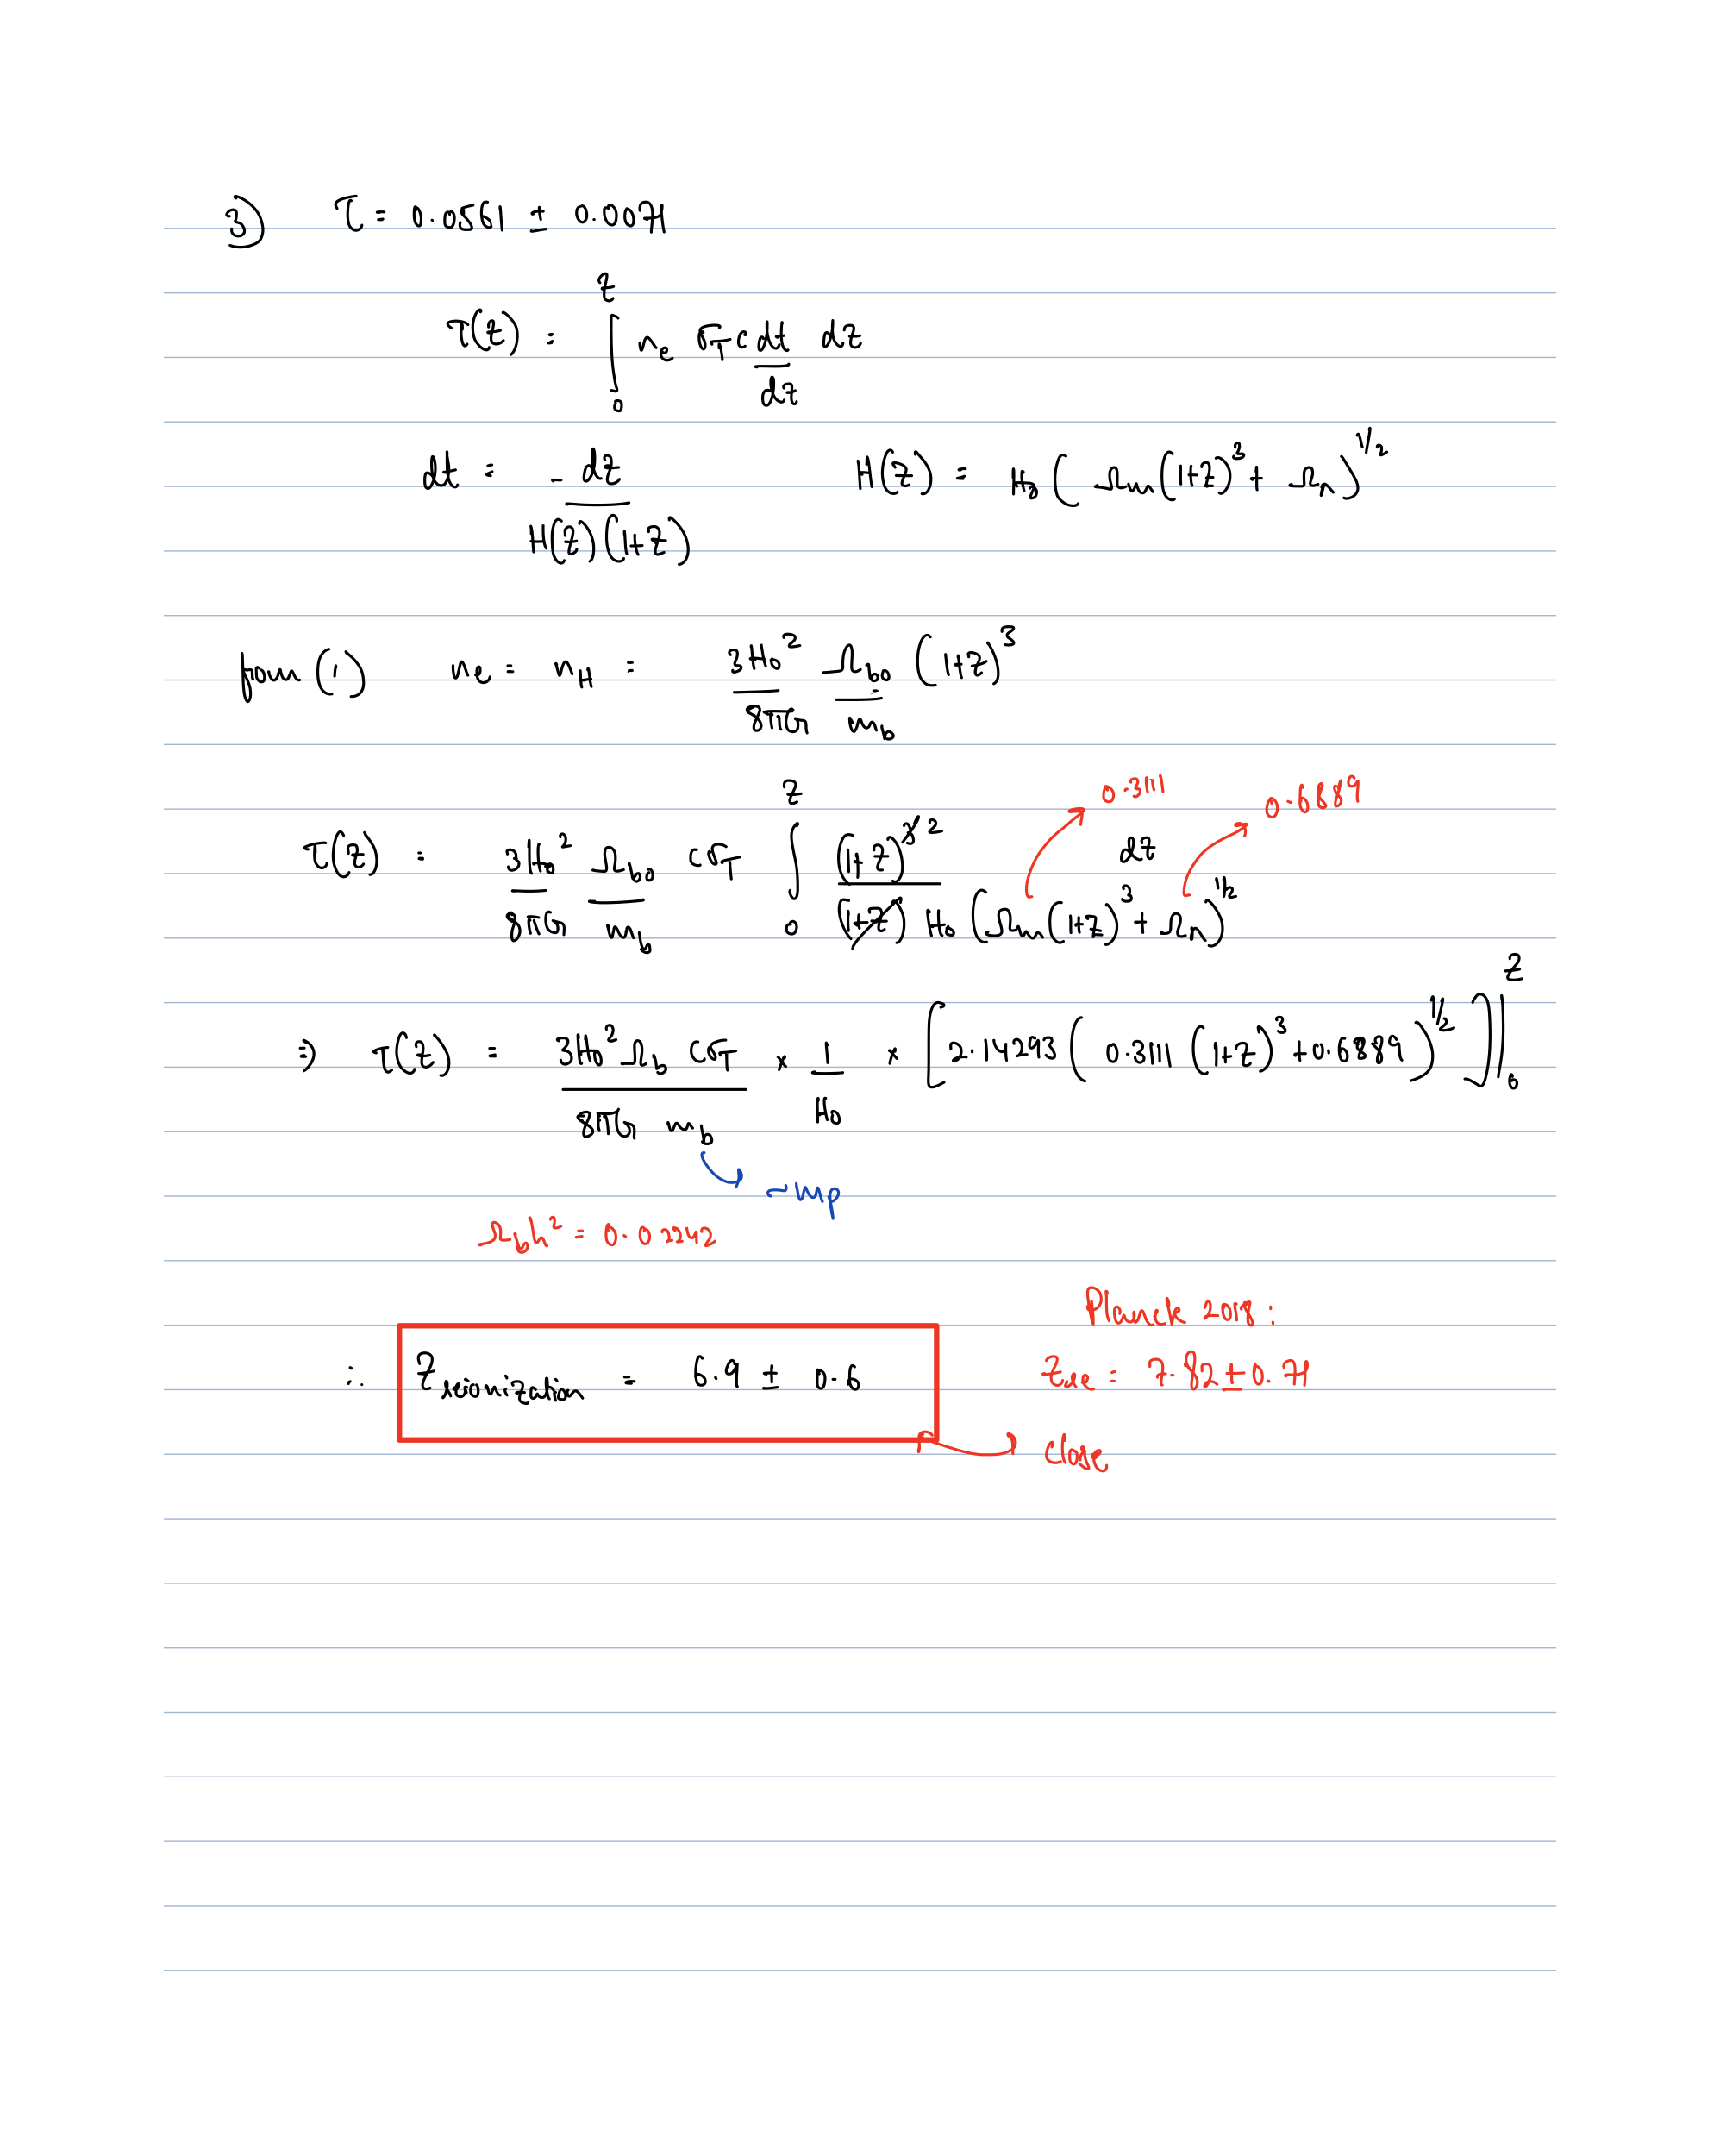

In [30]:
#import fsolve
from scipy.optimize import fsolve

def tau(z):
    #Optical depth in reionized Universe:
    H= 100 *u.km/u.s/u.Mpc #H0 = H * h 
    H0 = 67.66 *u.km/u.s/u.Mpc
    const1 = 3*H**2 * 0.02242 * const.c * const.sigma_T/(8*np.pi*const.G*const.m_p *H0)
    optical_depth = (const1* 2.14293*((0.311*(1+z)**3 + 0.6889)**0.5 - 1)).decompose().value
    return optical_depth

#Find z where tau(z) = 0.0561 +/- 0.0071:
z_reion = fsolve(lambda z: tau(z)-0.0561, 10)
z_reion = z_reion[0]

#Errors:
z_1 = fsolve(lambda z: tau(z)-0.0561-0.0071, 10)
z_1 = z_1[0]

z_2 = fsolve(lambda z: tau(z)-0.0561+0.0071, 10)
z_2 = z_2[0]

z_error = abs((z_2-z_1)/2)
print('Redshift of reionization:', z_reion, '+/-', z_error)

Redshift of reionization: 6.909088479405141 +/- 0.6170375601769278
